In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive.zip'

Archive:  /content/drive/MyDrive/archive.zip
  inflating: games.csv               
  inflating: games.json              


In [ ]:
df = pd.read_csv('games.csv')
# Important features: Estimated owners(to do), Peak CCU, Required age, DLC count, Supported languages(maybe counting), Full audio languages(maybe counting), Windows, Mac, Linux, Metacritic score, User score, Positive, Negative, Achievements, Recommendations, Average playtime forever, Average playtime two weeks, Median playtime forever, Median playtime two weeks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header image                85103 non-null  object 
 13  Website                     394

In [ ]:
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [ ]:
df.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,44.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,1.355681e+06,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,98.909091,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
std,6.949952e+05,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,0.857747,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.723900e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.331540e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.918415e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.765800e+06,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header image                85103 non-null  object 
 13  Website                     394

In [ ]:
df['Price'].nunique()

584

In [ ]:
df.corr(numeric_only=True)

,AppID,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
AppID,1.000000,-0.014091,-0.101025,-0.054967,-0.029680,0.007120,-0.205228,-0.149160,-0.275571,-0.017089,-0.049009,-0.039741,0.152725,-0.059744,-0.051243,-0.088621,-0.035440,-0.053978,-0.033358
Peak CCU,-0.014091,1.000000,0.035017,0.039737,0.009283,0.000468,0.007650,0.008408,0.059138,-0.000538,0.643179,0.584971,-0.254030,0.007287,0.517000,0.157138,0.094095,0.026327,0.058682
Required age,-0.101025,0.035017,1.000000,0.096285,0.015106,-0.007112,-0.005594,0.000265,0.196990,0.080111,0.068224,0.064921,0.079917,0.004949,0.096702,0.049382,0.056233,0.018491,0.052600
Price,-0.054967,0.039737,0.096285,1.000000,0.042934,-0.017457,0.025522,0.018747,0.141263,-0.000718,0.029271,0.025202,0.281748,0.006826,0.043055,0.062672,0.065388,0.041303,0.064112
DLC count,-0.029680,0.009283,0.015106,0.042934,1.000000,0.000698,0.015971,0.007679,0.025320,0.000622,0.019362,0.017516,-0.118653,0.033534,0.022028,0.035371,0.022389,0.015367,0.021789
Windows,0.007120,0.000468,-0.007112,-0.017457,0.000698,1.000000,-0.030509,-0.003802,0.004077,0.000418,0.000722,0.000601,NaN,0.001858,0.000800,0.001491,0.001062,0.000986,0.001049
Mac,-0.205228,0.007650,-0.005594,0.025522,0.015971,-0.030509,1.000000,0.570375,0.114041,0.002998,0.025877,0.010981,-0.123797,0.010967,0.022270,0.030329,0.005152,0.017010,0.003894
Linux,-0.149160,0.008408,0.000265,0.018747,0.007679,-0.003802,0.570375,1.000000,0.093632,0.006583,0.027517,0.011983,-0.005814,0.014994,0.023987,0.021407,0.003882,0.011009,0.001118
Metacritic score,-0.275571,0.059138,0.196990,0.141263,0.025320,0.004077,0.114041,0.093632,1.000000,-0.001877,0.119307,0.080556,0.196195,0.017129,0.124011,0.109433,0.109783,0.045650,0.107077
User score,-0.017089,-0.000538,0.080111,-0.000718,0.000622,0.000418,0.002998,0.006583,-0.001877,1.000000,-0.000745,-0.000622,0.941245,0.002270,-0.000618,0.000017,0.000380,0.000291,0.000264


In [ ]:
train, test = train_test_split(df, test_size=0.4, random_state=42)

# ['Name', 'Release date', 'About the game', 'Supported languages', 'Full audio languages', 'Header image', 'Support email', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'
test = test.drop(['AppID', 'Name', 'Release date', 'About the game', 'Supported languages', 'Full audio languages', 'Header image', 'Support email', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies', 'Price', 'Reviews', 'Website', 'Support url', 'Metacritic url', 'Notes'], axis=1)
train = train.drop(['AppID', 'Name', 'Release date', 'About the game', 'Supported languages', 'Full audio languages', 'Header image', 'Support email', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies', 'Reviews', 'Website', 'Support url', 'Metacritic url', 'Notes'], axis=1)

In [ ]:
train.head()

,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
28445,0 - 20000,0,0,17.99,0,True,False,False,0,0,0,1,NaN,0,0,0,0,0,0
62,200000 - 500000,1,0,2.99,0,True,False,False,0,0,283,92,NaN,0,0,183,0,196,0
16487,100000 - 200000,2,17,14.99,0,True,True,False,74,0,473,96,NaN,36,360,500,0,516,0
45430,200000 - 500000,4,0,4.99,2,True,False,False,0,0,7222,252,NaN,69,7285,152,0,118,0
54835,20000 - 50000,2,0,0.00,15,True,False,False,0,0,514,104,NaN,45,554,1061,0,2028,0


In [ ]:
test.head()

,Estimated owners,Peak CCU,Required age,DLC count,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
41461,0 - 20000,0,0,0,True,False,False,75,0,369,49,NaN,0,456,0,0,0,0
1815,500000 - 1000000,12,17,3,True,False,False,66,0,4748,2863,NaN,58,5205,193,0,107,0
68875,0 - 20000,1,0,0,True,False,False,0,0,1,0,NaN,0,0,0,0,0,0
44118,0 - 20000,0,0,0,True,True,False,73,0,45,16,NaN,32,0,0,0,0,0
33987,0 - 20000,0,0,0,True,False,False,0,0,2,0,NaN,18,0,0,0,0,0


In [ ]:
print(f'train.shape: {train.shape}')
print(f'test.shape : {test.shape}')

train.shape: (51061, 19)
test.shape : (34042, 18)


In [ ]:
target_feature = list(set(train.columns)-set(test.columns))[0]
target_feature

'Price'

In [ ]:
def df_dtypes(df):
    pd.set_option('display.max_colwidth', None)

    df_dtypes = df.columns.groupby(df.dtypes)
    df_dtypes = pd.DataFrame({
        'dtype':     list(df_dtypes.keys()),
        '# columns': [len(df_dtypes[key])  for key in df_dtypes.keys()],
        'columns':   [list(df_dtypes[key]) for key in df_dtypes.keys()],
    })
    df_dtypes = df_dtypes.style.applymap(lambda x:'text-align: left', subset=['columns'])
    return df_dtypes

In [ ]:
df_dtypes(train)

,dtype,# columns,columns
0,bool,3,"['Windows', 'Mac', 'Linux']"
1,int64,13,"['Peak CCU', 'Required age', 'DLC count', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
2,float64,2,"['Price', 'Score rank']"
3,object,1,['Estimated owners']


In [ ]:
def compute_dtype(df):
    return [df[col].dtype                                              for col in df.columns]
def compute_count(df):
    return [df[col].count()                                            for col in df.columns]
def compute_mean(df, features):
    return [round(df[col].mean(), 1)        if col in features else '' for col in df.columns]
def compute_std(df, features):
    return [round(df[col].std(), 1)         if col in features else '' for col in df.columns]
def compute_min(df, features):
    return [round(df[col].min(), 1)         if col in features else '' for col in df.columns]
def compute_max(df, features):
    return [round(df[col].max(), 1)         if col in features else '' for col in df.columns]
def compute_quantile(df, features, percentage):
    return [round(df[col].quantile(percentage), 1) \
                                            if col in features else '' for col in df.columns]
def compute_IQR(df, features):
    return [round(df[col].max()-df[col].min(), 1) \
                                            if col in features else '' for col in df.columns]
def compute_nunique(df):
    return [df[col].nunique()                                          for col in df.columns]
def compute_unique(df, threshold):
    return [df[col].unique()  if df[col].nunique() < threshold else '' for col in df.columns]
def compute_mode(df):
    return [df[col].mode()[0]           if len(df[col].mode()) else '' for col in df.columns]
def compute_mode_count(df):
    return [df[col].value_counts().max()                               for col in df.columns]
def compute_mode_percentage(df):
    return [round(df[col].value_counts().max() * 100 / df.shape[0], 1) for col in df.columns]
def compute_null_count(df):
    return [df[col].isnull().sum()                                     for col in df.columns]
def compute_null_percentage(df):
    return [round(df[col].isnull().mean() * 100, 1)                    for col in df.columns]

In [ ]:
def build_my_info_table(df, nunique_threshold=30):
    numerical_features = df.select_dtypes(include=[np.number])
    df_info = pd.DataFrame({
        '#':        np.arange(len(df.columns)),
        'column':   df.columns,
        'dtype':    compute_dtype(df),
        'count':    compute_count(df),
        'mean':     compute_mean(df, numerical_features),
        'std':      compute_std(df, numerical_features),
        'min':      compute_min(df, numerical_features),
        '25%':      compute_quantile(df, numerical_features, .25),
        '50%':      compute_quantile(df, numerical_features, .5),
        '75%':      compute_quantile(df, numerical_features, .75),
        'max':      compute_max(df, numerical_features),
        'IQR':      compute_IQR(df, numerical_features),
        'nunique':  compute_nunique(df),
        'unique':   compute_unique(df, nunique_threshold),
        'mode':     compute_mode(df),
        'mode #':   compute_mode_count(df),
        'mode %':   compute_mode_percentage(df),
        'null #':   compute_null_count(df),
        'null %':   compute_null_percentage(df),
    })
    df_info = df_info.sort_values(by='dtype')
    return df_info

In [ ]:
build_my_info_table(train)

,#,column,dtype,count,mean,std,min,25%,50%,75%,max,IQR,nunique,unique,mode,mode #,mode %,null #,null %
5,5,Windows,bool,51061,,,,,,,,,2,"[True, False]",True,51044,100.0,0,0.0
6,6,Mac,bool,51061,,,,,,,,,2,"[False, True]",False,41245,80.8,0,0.0
7,7,Linux,bool,51061,,,,,,,,,2,"[False, True]",False,44360,86.9,0,0.0
9,9,User score,int64,51061,0.0,1.6,0,0.0,0.0,0.0,100,100,20,"[0, 63, 51, 77, 100, 78, 69, 61, 84, 60, 95, 65, 68, 71, 94, 98, 92, 46, 55, 82]",0,51038,100.0,0,0.0
16,16,Average playtime two weeks,int64,51061,10.4,193.0,0,0.0,0.0,0.0,19159,19159,576,,0,49849,97.6,0,0.0
15,15,Average playtime forever,int64,51061,104.1,1228.8,0,0.0,0.0,0.0,145727,145727,1700,,0,42147,82.5,0,0.0
14,14,Recommendations,int64,51061,768.8,20379.9,0,0.0,0.0,0.0,3441592,3441592,2866,,0,42899,84.0,0,0.0
13,13,Achievements,int64,51061,20.0,175.3,0,0.0,0.0,18.0,9821,9821,331,,0,26092,51.1,0,0.0
11,11,Negative,int64,51061,169.4,5685.5,0,0.0,2.0,13.0,895978,895978,1713,,0,20475,40.1,0,0.0
10,10,Positive,int64,51061,984.7,29484.8,0,0.0,7.0,45.0,5764420,5764420,3284,,0,14034,27.5,0,0.0


In [ ]:
def plot_bar_chart(df, x, y, xlabel, ylabel, title, xmin=None, xmax=None, palette='deep'):
    if df.shape[0] == 0:
        return
    size = (12, df.shape[0] / 4 + 1)
    plt.figure(figsize=size)
    sns.barplot(y=df[y], x=df[x], palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if not xmin and not xmax:
        xmin, xmax = df[x].min(), df[x].max()
        xrange = (xmax - xmin) * .1
        xmin, xmax = xmin-xrange, xmax+xrange
    plt.xlim(xmin, xmax)
    plt.tight_layout()
    plt.show()

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


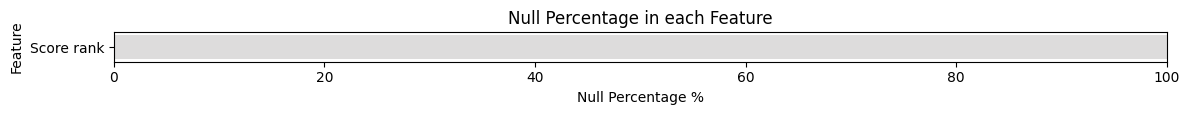

In [ ]:
train_info = build_my_info_table(train)
nan_df = train_info[train_info['null %'] >= 10][['column', 'null %']].sort_values(by='null %')
plot_bar_chart(nan_df, x='null %', y='column', xlabel='Null Percentage %', ylabel='Feature', title='Null Percentage in each Feature', xmin=0, xmax=100, palette='coolwarm')

In [ ]:
train = train.drop(columns=list(nan_df[nan_df['null %'] > 50]['column']))
test  = test.drop(columns=list(nan_df[nan_df['null %'] > 50]['column']))

In [ ]:
test_info = build_my_info_table(test)
nan_df = test_info[test_info['null %'] >= 10][['column', 'null %']].sort_values(by='null %')
plot_bar_chart(nan_df, x='null %', y='column', xlabel='Null Percentage %', ylabel='Feature', title='Null Percentage in each Feature', xmin=0, xmax=100, palette='coolwarm')

In [ ]:
train = train.drop(columns=list(nan_df[nan_df['null %'] > 50]['column']))
test  = test.drop(columns=list(nan_df[nan_df['null %'] > 50]['column']))

In [ ]:
def fillna(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())
    categorical_features = df.select_dtypes(exclude=[np.number]).columns
    for col in categorical_features:
        df[col] = df[col].fillna(df[col].mode()[0])

def replace_inf(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns
    df[numerical_features] = df[numerical_features].replace([np.inf, -np.inf], np.nan)
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

In [ ]:
replace_inf(train)
replace_inf(test)
fillna(train)
fillna(test)

In [ ]:
def get_categorical_features(df, nunique_threshold=30):
    all_df_columns = df.columns
    categorical_features = [col for col in all_df_columns if df[col].nunique() < nunique_threshold]
    return categorical_features

def get_numerical_features(df, nunique_threshold=30):
    numerical_df_columns = df.select_dtypes(include=[np.number]).columns
    numerical_features   = [col for col in numerical_df_columns if df[col].nunique() >= nunique_threshold]
    return numerical_features

In [ ]:
categorical_features = get_categorical_features(train)
numerical_features   = get_numerical_features(train)
print(f'categorical_features: {len(categorical_features)}\n{categorical_features}\n')
print(f'numerical_features:   {len(numerical_features)}\n{numerical_features}\n')

categorical_features: 6
['Estimated owners', 'Required age', 'Windows', 'Mac', 'Linux', 'User score']

numerical_features:   12
['Peak CCU', 'Price', 'DLC count', 'Metacritic score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']



In [ ]:
print(f'train.shape: {train.shape}')
print(f'test.shape : {test.shape}')

train.shape: (51061, 18)
test.shape : (34042, 17)


In [ ]:
# Distribution Plots:
def my_histplot(df, col, ax):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram Plot of {col}')
def my_distplot(df, col, ax):
    sns.distplot(df[col], ax=ax)
    ax.set_title(f'Distribution Plot of {col}')
def my_kdeplot(df, col, ax):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f'KDE Plot of {col}')

# Categorical Plots:
def my_pie_chart(df, col, ax):
    labels = df[col].value_counts()
    ax.pie(labels, labels=labels.index, autopct='%1.1f%%')
    ax.set_title(f'Pie Chart of {col}')
def my_countplot(df, col, ax):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
def my_boxplot(df, col, ax):
    sns.boxplot(y=df[col], ax=ax)
def my_violinplot(df, col, ax):
    sns.violinplot(y=df[col], ax=ax)

# Matrix Plots:
def my_heatmap(df, size, cmap, cbar_kws, font_size):
    plt.figure(figsize=size)
    sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap=cmap, center=0, cbar_kws=cbar_kws, annot_kws={"size": font_size})
    plt.title('Correlation Heatmap')
    plt.show()

In [ ]:
def plot_features(df, plot_funcs, width_ratios, height_ratios, n_col=1):
    def plot_feature(cols):
        n_plot_funcs = len(plot_funcs)
        fig = plt.figure(figsize=(sum(width_ratios), max(height_ratios)))
        gs = fig.add_gridspec(1, n_plot_funcs*n_col, width_ratios=width_ratios, height_ratios=height_ratios)
        axes = [0] * (n_plot_funcs * n_col)

        for i in range(n_col):
            for j in range(n_plot_funcs):
                k = i*n_plot_funcs+j
                axes[k] = fig.add_subplot(gs[0, k])
                plot_funcs[j](df, cols[i], axes[k])
                axes[k].set_xlabel(cols[i])

        plt.tight_layout()
        plt.show()

    for i in range(0, len(df.columns), n_col):
        plot_feature(df.columns[i:i+n_col])

In [ ]:
def plot_numerical_features(df, plot_funcs=[my_boxplot, my_violinplot, my_distplot], width_ratios=[2, 2, 12], height_ratios=[4], n_col=1):
    plot_features(df, plot_funcs, width_ratios, height_ratios)

def plot_categorical_features(df, plot_funcs=[my_pie_chart, my_countplot], width_ratios=[5, 11], height_ratios=[5], n_col=1):
    plot_features(df, plot_funcs, width_ratios, height_ratios)

<ipython-input-167-ef8297cf8744>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)


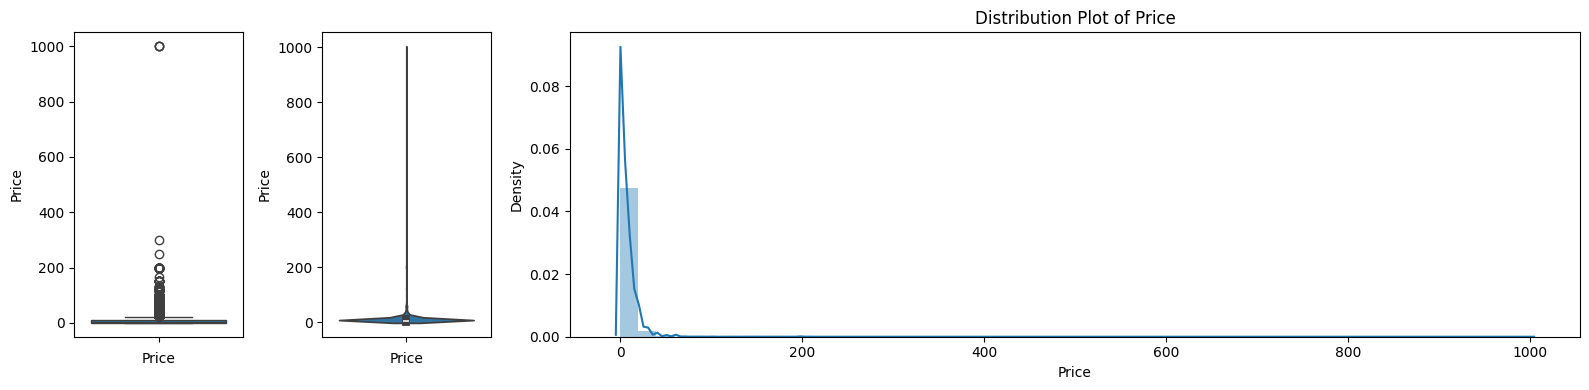

<ipython-input-167-ef8297cf8744>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)


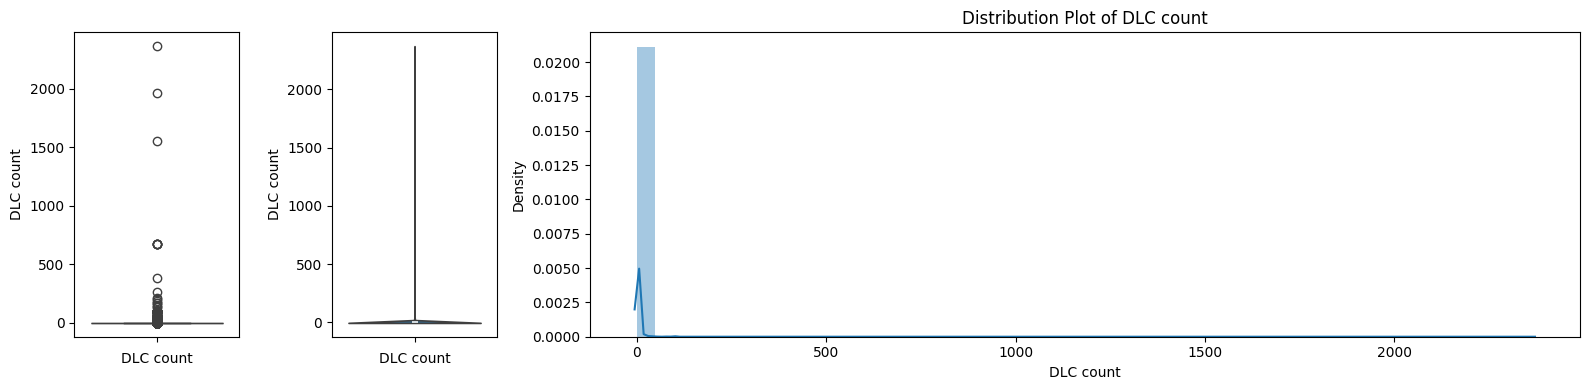

In [ ]:
plot_numerical_features(train[numerical_features[1:3]])

<ipython-input-81-ef8297cf8744>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


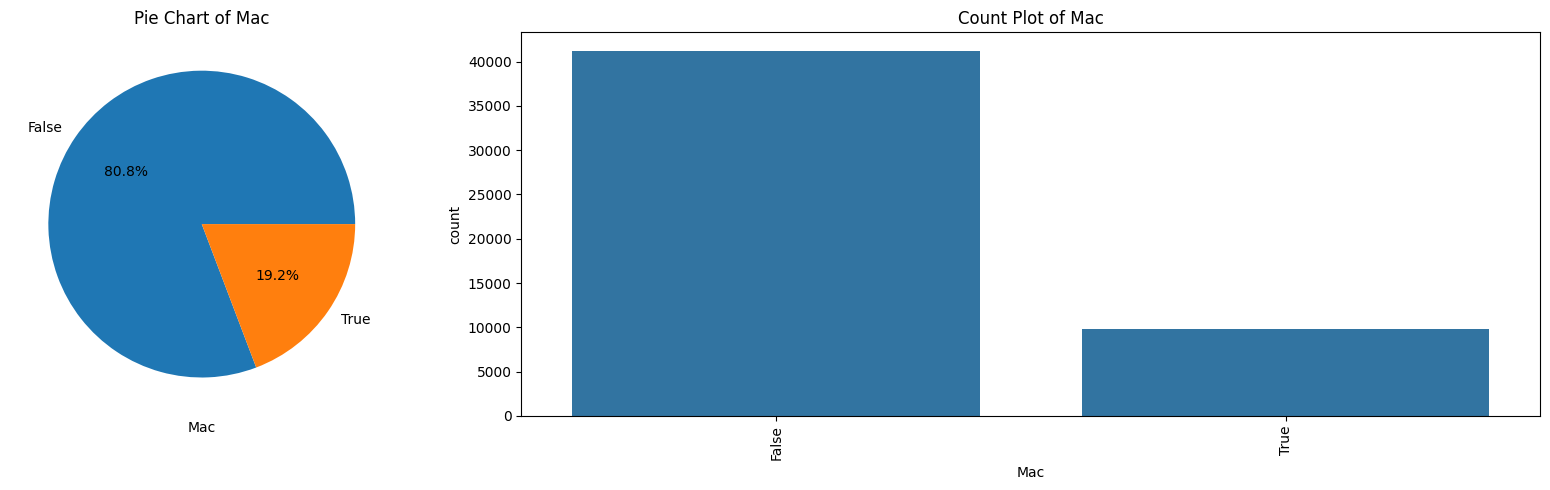

<ipython-input-81-ef8297cf8744>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


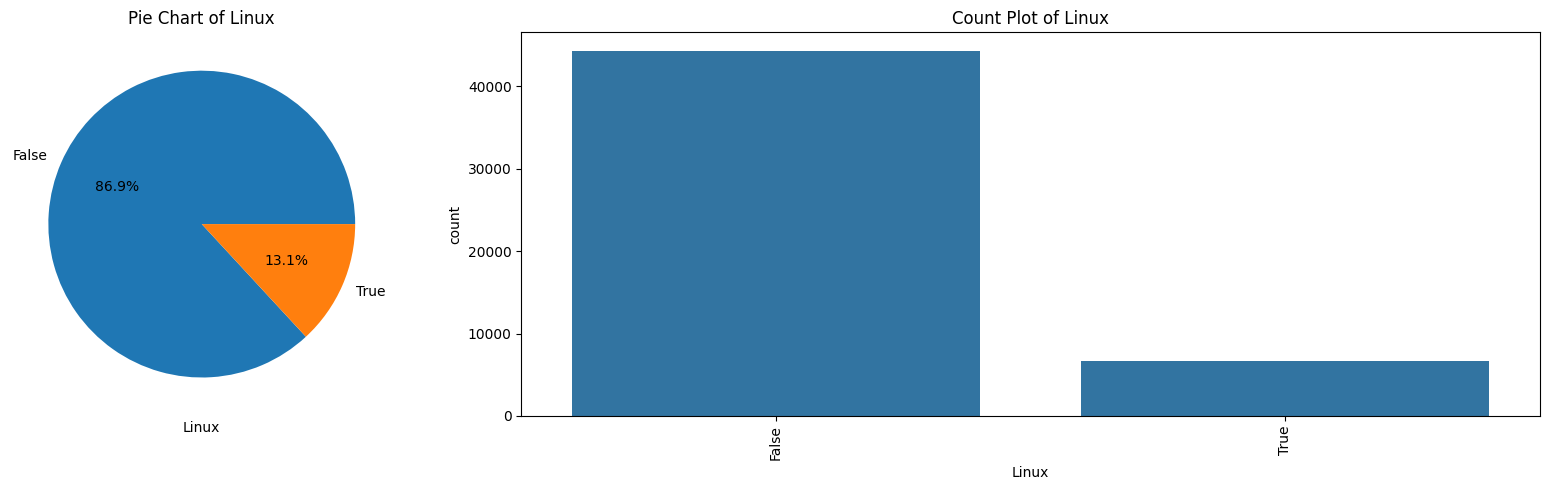

In [ ]:
plot_categorical_features(train[categorical_features[3:5]])

<ipython-input-121-ef8297cf8744>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)


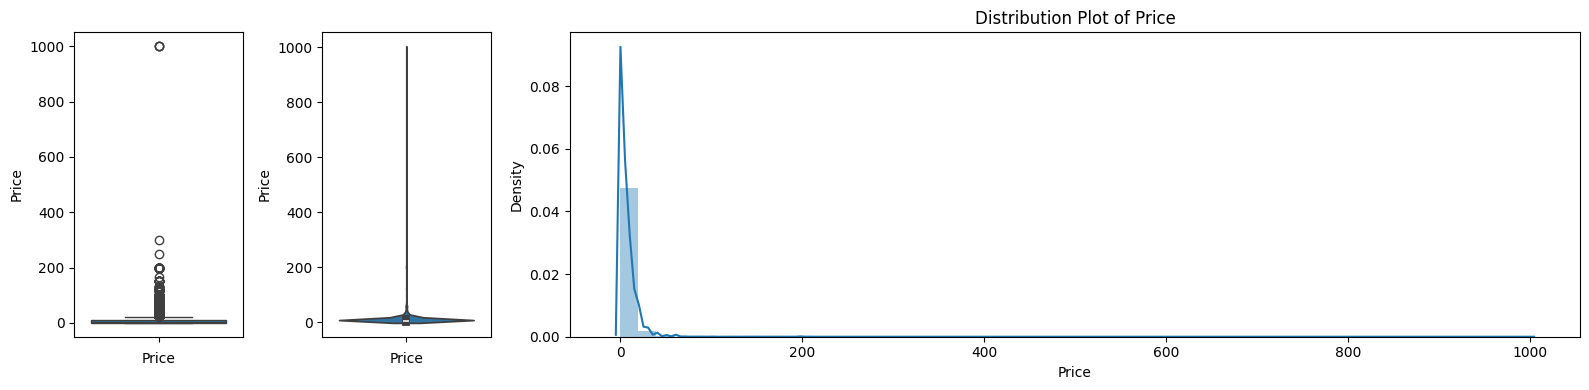

In [ ]:
plot_numerical_features(train[[target_feature]])

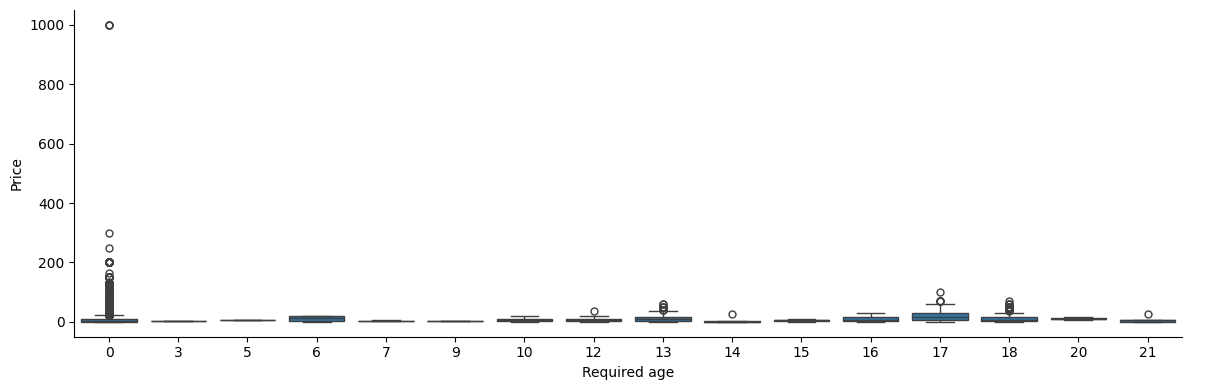

In [ ]:
sns.catplot(data=train, x=categorical_features[1], y=target_feature, kind='box', height=4, aspect=3)

In [ ]:
def plot_features_correlation(df, features, target_feature, plot_kinds, step=6, height=3, aspect=1):
    df = df.sample(min(1000, df.shape[0]))
    for i in range(0, len(features), step):
        for plot_kind in plot_kinds:
            sns.pairplot(df, x_vars=features[i:i+step], y_vars=[target_feature], kind=plot_kind, height=height, aspect=aspect)

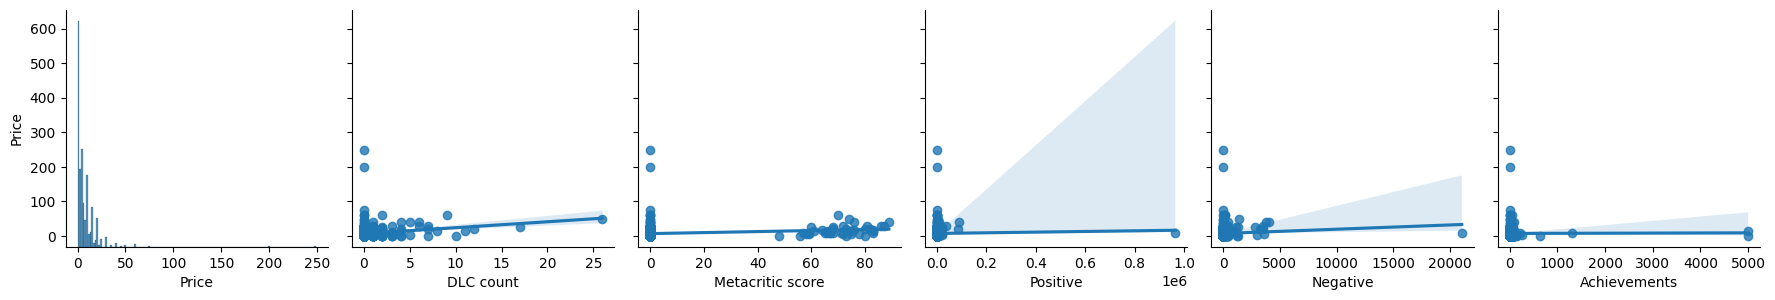

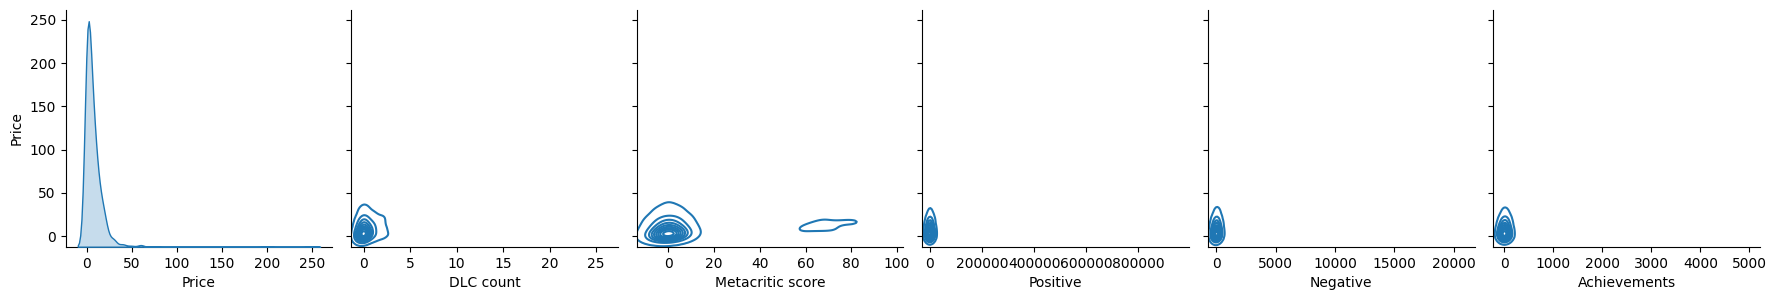

In [ ]:
plot_features_correlation(train, numerical_features[1:7], target_feature, plot_kinds=['reg', 'kde'])

In [ ]:
df_dtypes(train)

,dtype,# columns,columns
0,bool,3,"['Windows', 'Mac', 'Linux']"
1,int64,13,"['Peak CCU', 'Required age', 'DLC count', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
2,float64,1,['Price']
3,object,1,['Estimated owners']


In [ ]:
train_model1 = train.copy()
test_model1  = test.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_str_features(df):
    categorical_features = get_categorical_features(df.select_dtypes(exclude=[np.number]))
    label_encoder = LabelEncoder()
    for col in categorical_features:
        df[col] = label_encoder.fit_transform(df[col])

In [ ]:
encode_str_features(train_model1)
encode_str_features(test_model1)

In [ ]:
df_dtypes(train_model1)

,dtype,# columns,columns
0,int64,17,"['Estimated owners', 'Peak CCU', 'Required age', 'DLC count', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
1,float64,1,['Price']


In [ ]:
train_model1['Estimated owners'].unique()

array([ 1,  7,  2,  6,  0, 10,  3, 11,  8, 12,  4,  9, 13,  5])

In [ ]:
from sklearn.metrics         import mean_absolute_error, \
                                    mean_squared_error, \
                                    mean_absolute_percentage_error, \
                                    median_absolute_error, \
                                    max_error, \
                                    r2_score, \
                                    explained_variance_score

def evaluate_model(y_test, y_pred):
    mae   = mean_absolute_error(y_test, y_pred)
    mse   = mean_squared_error(y_test, y_pred)
    mape  = mean_absolute_percentage_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    me    = max_error(y_test, y_pred)
    r2    = r2_score(y_test, y_pred)
    ev    = explained_variance_score(y_test, y_pred)

    result = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Mean Absolute Percentage Error': mape,
        'Median Absolute Error': medae,
        'Max Error': me,
        'R^2': r2,
        'Explained Variance': ev,
    }
    return result

In [ ]:
from sklearn.linear_model    import LinearRegression, \
                                    Ridge

from sklearn.tree            import DecisionTreeRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.ensemble        import RandomForestRegressor

baseline_models = {
    'LinearRegression':          LinearRegression(),
    'Ridge':                     Ridge(),
    'DecisionTreeRegressor':     DecisionTreeRegressor(),
}
#    'RandomForestRegressor':     RandomForestRegressor(),
#    'KNeighborsRegressor':       KNeighborsRegressor(),

In [ ]:
def run_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        print(f'Model {name} begining now ...')
        begin_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = evaluate_model(y_test, y_pred)
        end_time = time.time()
        duration = round((end_time - begin_time) / 60, 2)
        print(f'Model {name} run in'.ljust(50), f'{duration} minutes')
    results = pd.DataFrame(results).T
    results = results.reset_index()
    results = results.rename(columns={'index': 'Model'})
    return results

In [ ]:
def split_data_train_test(df, target_feature, test_size=0.2):
    y = df[target_feature]
    X = df.drop(columns=[target_feature])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_data_train_test(train_model1, target_feature)

In [ ]:
models_result1 = run_models(baseline_models, X_train, X_test, y_train, y_test)

Model LinearRegression begining now ...
Model LinearRegression run in                      0.0 minutes
Model Ridge begining now ...
Model Ridge run in                                 0.0 minutes
Model DecisionTreeRegressor begining now ...
Model DecisionTreeRegressor run in                 0.01 minutes


In [ ]:
models_result1

,Model,Mean Absolute Error,Mean Squared Error,Mean Absolute Percentage Error,Median Absolute Error,Max Error,R^2,Explained Variance
0,LinearRegression,6.310056,235.122022,6.011949e+15,5.005560,993.484159,-0.005103,-0.005075
1,Ridge,6.310068,235.118648,6.012279e+15,5.005596,993.484025,-0.005088,-0.005060
2,DecisionTreeRegressor,6.416750,252.100294,3.208143e+15,4.000000,990.394779,-0.077682,-0.077518


<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


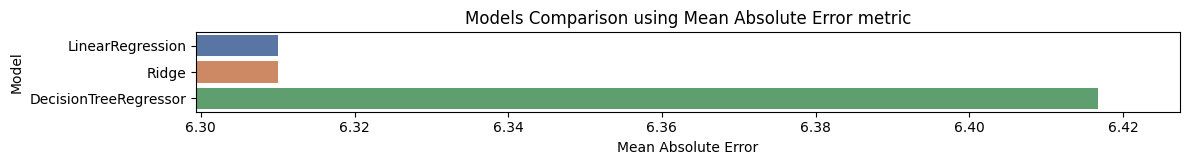

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


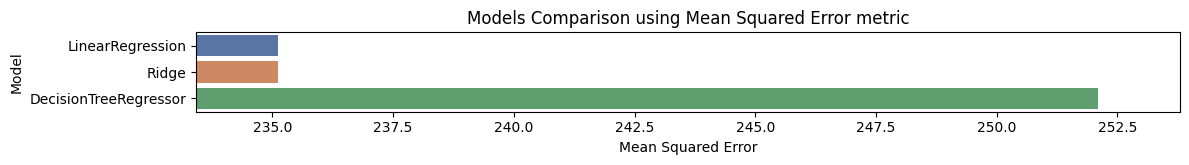

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


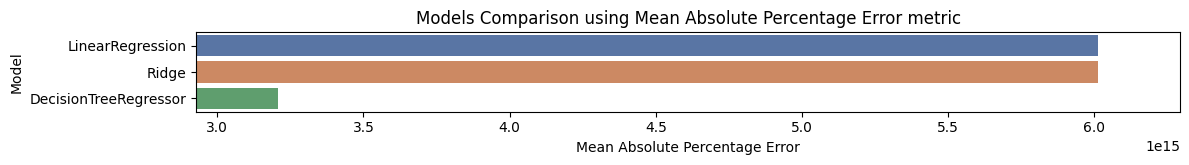

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


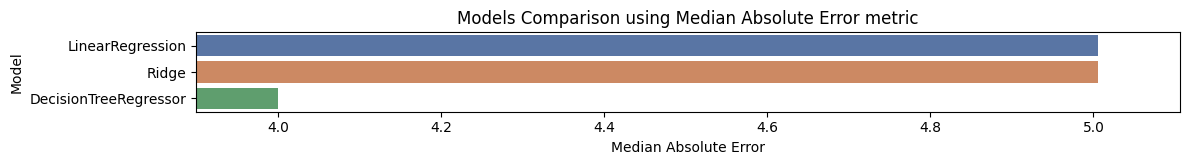

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


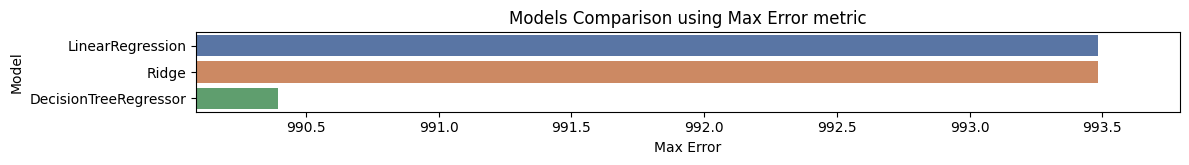

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


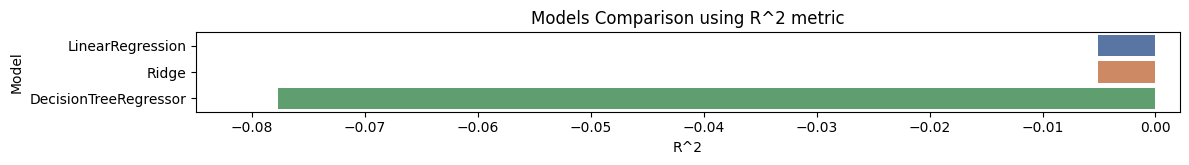

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


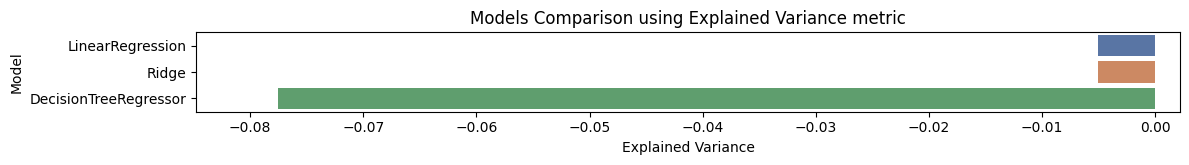

In [ ]:
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'Mean Absolute Percentage Error', 'Median Absolute Error', 'Max Error', 'R^2', 'Explained Variance']
for metric in metrics:
    plot_bar_chart(models_result1, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [ ]:
def get_best_model(results_df, models, metric):
    best_model_name = results_df.sort_values(by=[metric]).head(1)['Model'].iloc[0]
    best_model = models[best_model_name]
    return best_model

In [ ]:
best_models1 = get_best_model(models_result1, baseline_models, 'Mean Squared Error')
print('Best Model of Baseline Models is:', best_models1.__class__.__name__)

Best Model of Baseline Models is: Ridge


In [ ]:
del train_model1, test_model1, X_train, X_test, y_train, y_test

In [ ]:
df_dtypes(train)

,dtype,# columns,columns
0,bool,3,"['Windows', 'Mac', 'Linux']"
1,int64,13,"['Peak CCU', 'Required age', 'DLC count', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
2,float64,1,['Price']
3,object,1,['Estimated owners']


In [ ]:
train_model2 = train.copy()
test_model2  = test.copy()

In [ ]:
encode_str_features(train_model2)
encode_str_features(test_model2)
df_dtypes(train_model2)

,dtype,# columns,columns
0,int64,17,"['Estimated owners', 'Peak CCU', 'Required age', 'DLC count', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
1,float64,1,['Price']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(df):
    categorical_features = get_categorical_features(df.select_dtypes(include=[np.number]))
    if target_feature in categorical_features:
        categorical_features.remove(target_feature)
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_features = encoder.fit_transform(df[categorical_features])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features), index=df.index)
    df = df.drop(columns=categorical_features)
    df = pd.concat([df, encoded_df], axis=1)
    return df

In [ ]:
train_model2 = train_model2.drop(columns=train_model2.select_dtypes(exclude=[np.number]).columns)
test_model2  = test_model2.drop(columns=test_model2.select_dtypes(exclude=[np.number]).columns)
df_dtypes(train_model2)

,dtype,# columns,columns
0,int64,17,"['Estimated owners', 'Peak CCU', 'Required age', 'DLC count', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
1,float64,1,['Price']


In [ ]:
def get_skewed_features(df, threshold=0.25):
    numerical_features = get_numerical_features(df)
    skew_df = df[numerical_features].apply(lambda x: x.skew())
    skew_df = skew_df.sort_values(ascending=False)
    skew_df = skew_df.reset_index()
    skew_df.columns = ['Feature', 'SkewFactor']
    skewed_features = list(skew_df[abs(skew_df['SkewFactor']) > threshold]['Feature'])
    non_skewed_features = list(set(numerical_features)-set(skewed_features))
    return skewed_features, non_skewed_features, skew_df

In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

def transform_non_skewed_features(df, non_skewed_features):
    for col in non_skewed_features:
        df[col] = standardScaler.fit_transform(df[[col]])

def transform_skewed_features(df, skewed_features):
    for col in skewed_features:
        negative_indices = df[col] < 0
        df[col] = np.log1p(np.abs(df[col]))
        df[col] = np.where(negative_indices, -df[col], df[col])

In [ ]:
skewed_features, non_skewed_features, skew_df = get_skewed_features(train_model2)
print(f'skewed_features:     {len(skewed_features)}\n{skewed_features}\n')
print(f'non_skewed_features: {len(non_skewed_features)}\n{non_skewed_features}\n')

skewed_features:     12
['Positive', 'Negative', 'Recommendations', 'Peak CCU', 'DLC count', 'Median playtime forever', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime two weeks', 'Price', 'Achievements', 'Metacritic score']

non_skewed_features: 0
[]



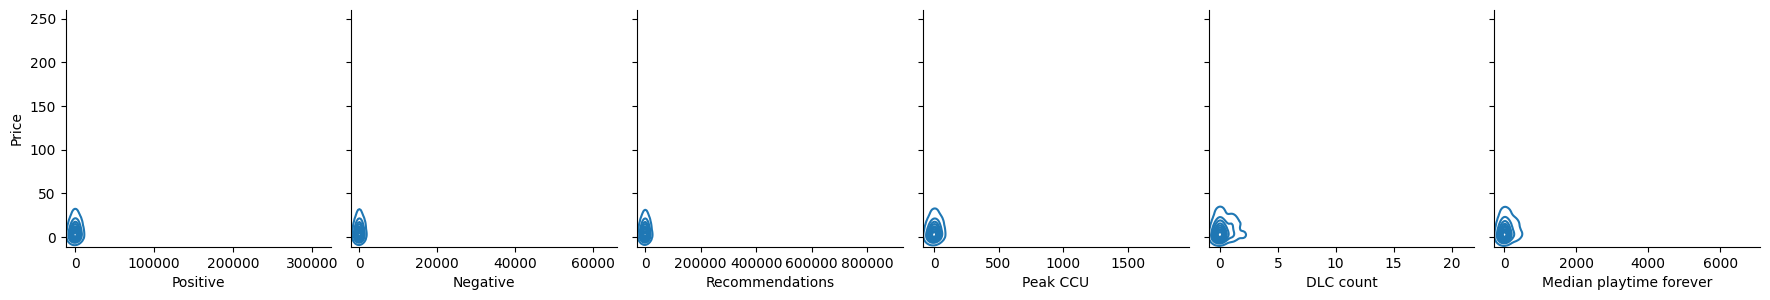

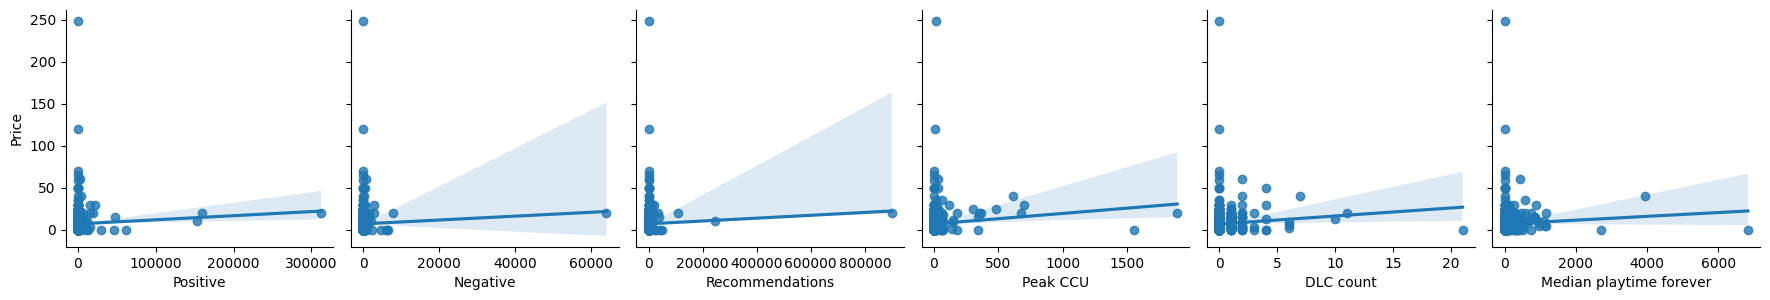

In [ ]:
plot_features_correlation(train_model2, skewed_features[:6], target_feature, plot_kinds=['kde', 'reg'])

In [ ]:
transform_skewed_features(train_model2, skewed_features)

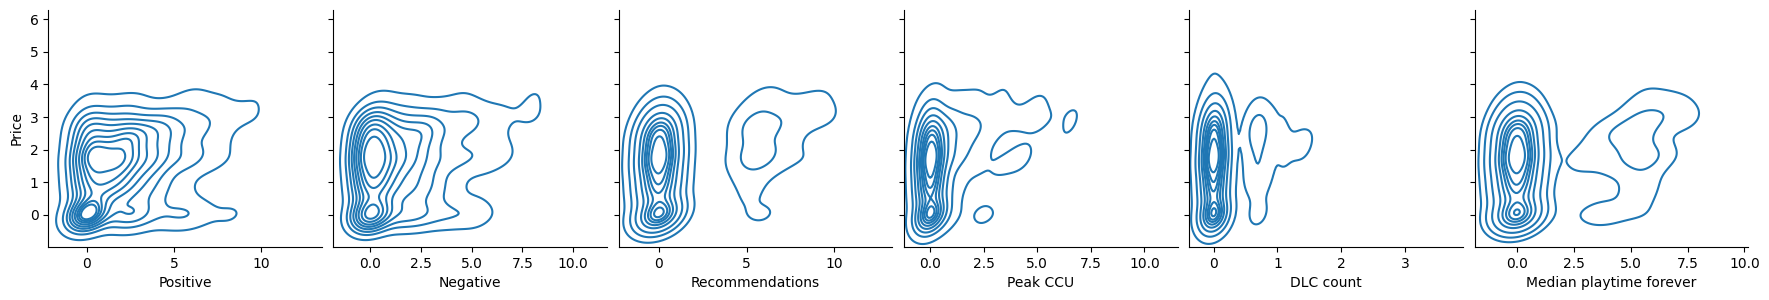

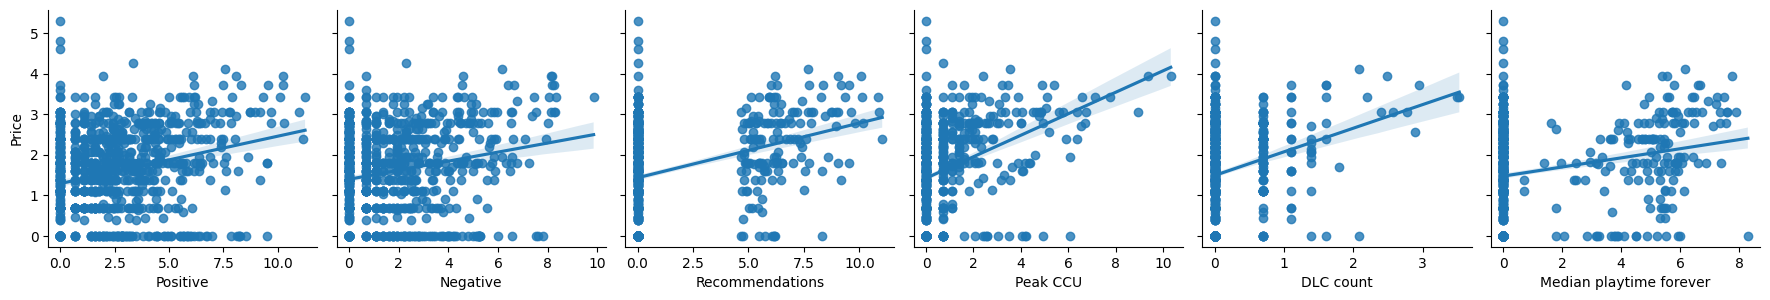

In [ ]:
plot_features_correlation(train_model2, skewed_features[:6], target_feature, plot_kinds=['kde', 'reg'])

In [ ]:
plot_features_correlation(train_model2, non_skewed_features[:6], target_feature, plot_kinds=['kde', 'reg'])

In [ ]:
plot_features_correlation(train_model2, non_skewed_features[:6], target_feature, plot_kinds=['kde', 'reg'])

In [ ]:
transform_non_skewed_features(train_model2, non_skewed_features)

In [ ]:
plot_features_correlation(train_model2, non_skewed_features[:6], target_feature, plot_kinds=['kde', 'reg'])

In [ ]:
skewed_features, non_skewed_features, skew_df = get_skewed_features(test_model2)
print(f'skewed_features:     {len(skewed_features)}\n{skewed_features}\n')
print(f'non_skewed_features: {len(non_skewed_features)}\n{non_skewed_features}\n')

skewed_features:     11
['Median playtime forever', 'DLC count', 'Peak CCU', 'Recommendations', 'Negative', 'Average playtime forever', 'Positive', 'Average playtime two weeks', 'Median playtime two weeks', 'Achievements', 'Metacritic score']

non_skewed_features: 0
[]



In [ ]:
transform_skewed_features(test_model2, skewed_features)
transform_non_skewed_features(test_model2, non_skewed_features)

In [ ]:
df_dtypes(train_model2)

,dtype,# columns,columns
0,int64,6,"['Estimated owners', 'Required age', 'Windows', 'Mac', 'Linux', 'User score']"
1,float64,12,"['Peak CCU', 'Price', 'DLC count', 'Metacritic score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"


In [ ]:
replace_inf(train_model2)
replace_inf(test_model2)
fillna(train_model2)
fillna(test_model2)

In [ ]:
def split_data_X_y(df, target_feature):
    y = df[target_feature]
    X = df.drop(columns=[target_feature])
    return X, y

In [ ]:
X, y = split_data_X_y(train_model2, target_feature)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def feature_selection(X, y, mutual_info_method, top_n=10):
    mutual_info = mutual_info_method(X, y)
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'ImportanceFactor': mutual_info
    })
    importance_df = pd.DataFrame(importance_df, columns=['Feature', 'ImportanceFactor'])
    importance_df = importance_df.sort_values(by='ImportanceFactor', ascending=False)
    importance_df = importance_df.head(top_n)
    return importance_df

In [ ]:
importance_df = feature_selection(X, y, mutual_info_regression)

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


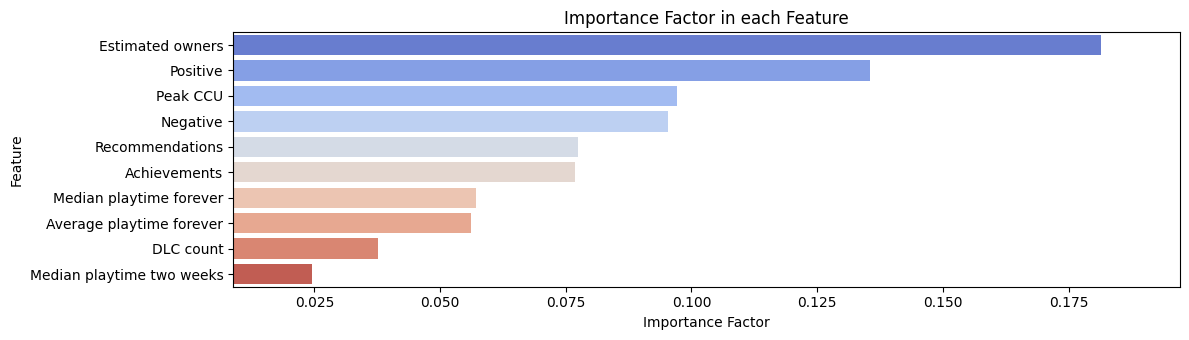

In [ ]:
plot_bar_chart(importance_df, x='ImportanceFactor', y='Feature', xlabel='Importance Factor', ylabel='Feature', title='Importance Factor in each Feature', palette='coolwarm')

In [ ]:
selected_features = importance_df['Feature']
X_selected  = X[selected_features]
test_model2 = test_model2[selected_features]
df_dtypes(X_selected)

,dtype,# columns,columns
0,int64,1,['Estimated owners']
1,float64,9,"['Positive', 'Peak CCU', 'Negative', 'Recommendations', 'Achievements', 'Median playtime forever', 'Average playtime forever', 'DLC count', 'Median playtime two weeks']"


In [ ]:
X_train_test_model2 = pd.concat([X_selected, test_model2])
X_train_test_model2 = one_hot_encoding(X_train_test_model2)
X_selected  = X_train_test_model2[:len(X_selected)]
test_model2 = X_train_test_model2[-len(test_model2):]
df_dtypes(X_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,dtype,# columns,columns
0,float64,22,"['Positive', 'Peak CCU', 'Negative', 'Recommendations', 'Achievements', 'Median playtime forever', 'Average playtime forever', 'DLC count', 'Median playtime two weeks', 'Estimated owners_1', 'Estimated owners_2', 'Estimated owners_3', 'Estimated owners_4', 'Estimated owners_5', 'Estimated owners_6', 'Estimated owners_7', 'Estimated owners_8', 'Estimated owners_9', 'Estimated owners_10', 'Estimated owners_11', 'Estimated owners_12', 'Estimated owners_13']"


In [ ]:
importance_df = feature_selection(X_selected, y, mutual_info_regression)

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


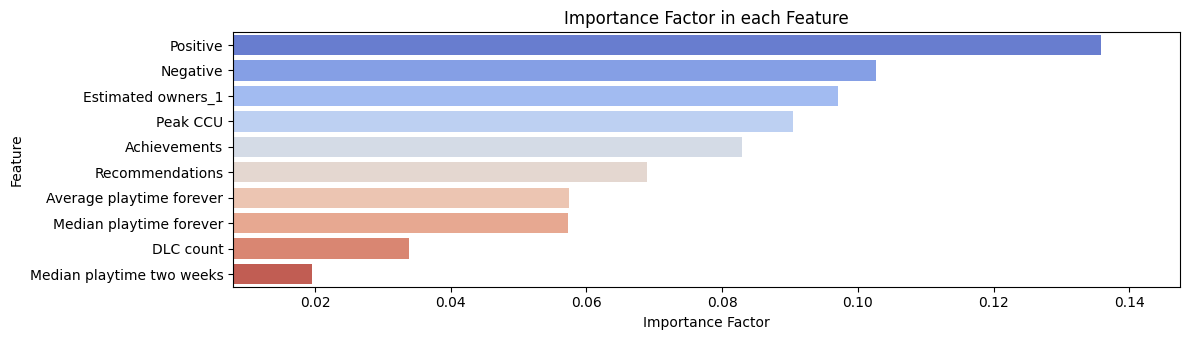

In [ ]:
plot_bar_chart(importance_df, x='ImportanceFactor', y='Feature', xlabel='Importance Factor', ylabel='Feature', title='Importance Factor in each Feature', palette='coolwarm')

In [ ]:
selected_features = importance_df['Feature']
X_selected  = X_selected[selected_features]
test_model2 = test_model2[selected_features]
df_dtypes(X_selected)

,dtype,# columns,columns
0,float64,10,"['Positive', 'Negative', 'Estimated owners_1', 'Peak CCU', 'Achievements', 'Recommendations', 'Average playtime forever', 'Median playtime forever', 'DLC count', 'Median playtime two weeks']"


In [ ]:
def get_target_correlations(df, target_feature):
    numerical_features  = df.select_dtypes(include=[np.number]).columns
    correlation_matrix  = df[numerical_features].corr()
    target_correlations = correlation_matrix[target_feature].sort_values(ascending=False)
    target_correlations = target_correlations.reset_index()
    target_correlations.columns = ['Feature', 'TargetCorrelation']
    return target_correlations

In [ ]:
correlations_df = get_target_correlations(pd.concat([X_selected, y], axis=1), target_feature)

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


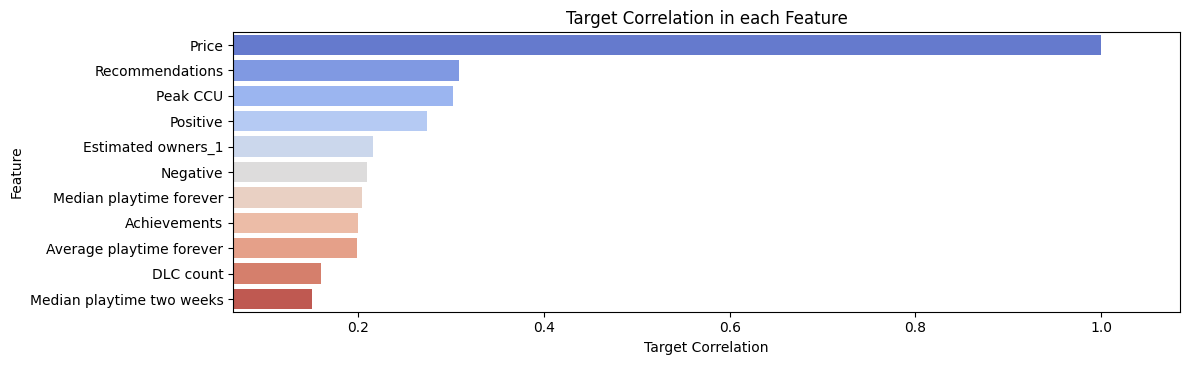

In [ ]:
plot_bar_chart(correlations_df, x='TargetCorrelation', y='Feature', xlabel='Target Correlation', ylabel='Feature', title='Target Correlation in each Feature', palette='coolwarm')

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

def plot_heatmap(df, size_factor=1/2):
    df = df.select_dtypes(include=[np.number])
    height = int(len(df.columns) * size_factor)
    font_size = max(min(12, 119 // height), 8)
    cmap = LinearSegmentedColormap.from_list(
        'custom_diverging',
        ['blue', 'lightblue', 'white', 'lightcoral', 'red'],
        N=5
    )
    cbar_kws = {'ticks': [-1, -.5, 0, .5, 1]}
    my_heatmap(df, size=(height+1, height+1), cmap=cmap, cbar_kws=cbar_kws, font_size=font_size)

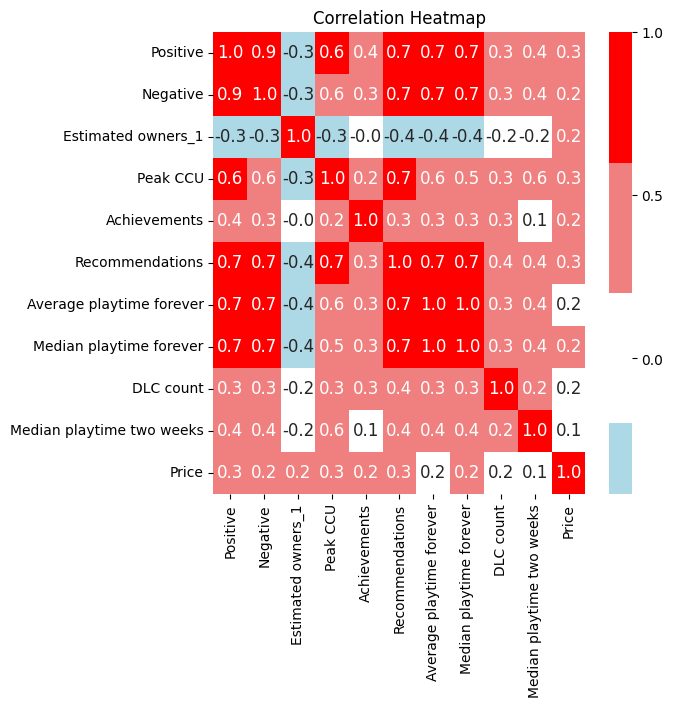

In [ ]:
plot_heatmap(pd.concat([X_selected, y], axis=1))

In [ ]:
X_train, X_test, y_train, y_test = split_data_train_test(pd.concat([X_selected, y], axis=1), target_feature)

In [ ]:
models_result2 = run_models(baseline_models, X_train, X_test, y_train, y_test)

Model LinearRegression begining now ...
Model LinearRegression run in                      0.0 minutes
Model Ridge begining now ...
Model Ridge run in                                 0.0 minutes
Model DecisionTreeRegressor begining now ...
Model DecisionTreeRegressor run in                 0.0 minutes


In [ ]:
models_result2

,Model,Mean Absolute Error,Mean Squared Error,Mean Absolute Percentage Error,Median Absolute Error,Max Error,R^2,Explained Variance
0,LinearRegression,0.741335,0.829799,8.940272e+14,0.683695,5.361118,0.272074,0.272102
1,Ridge,0.741341,0.829794,8.940709e+14,0.683786,5.361142,0.272079,0.272107
2,DecisionTreeRegressor,0.786532,1.098702,6.708688e+14,0.606894,5.118746,0.036184,0.036206


<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


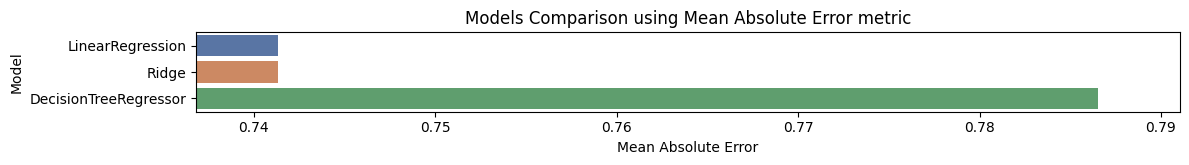

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


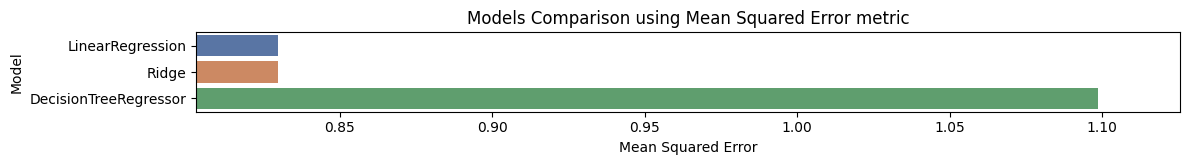

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


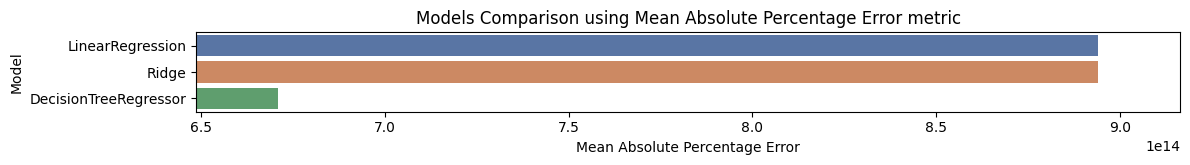

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


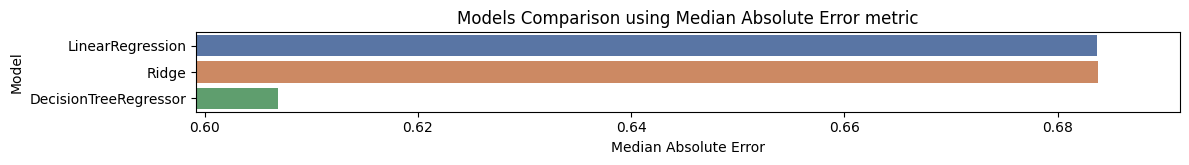

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


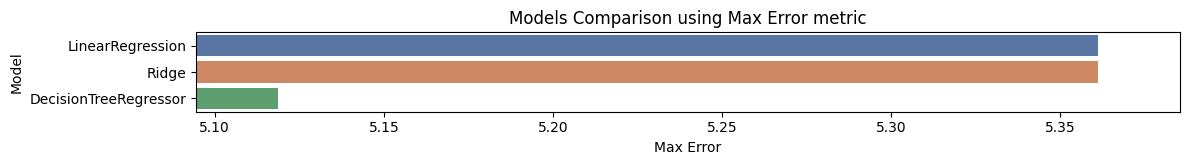

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


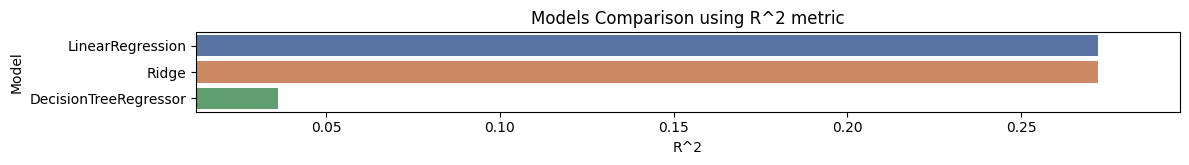

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


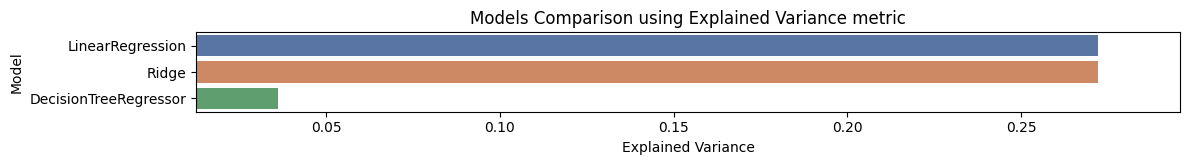

In [ ]:
for metric in metrics:
    plot_bar_chart(models_result2, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [ ]:
best_models2 = get_best_model(models_result2, baseline_models, 'Mean Squared Error')
print('Best Model of Enhanced Features Models is:', best_models2.__class__.__name__)

Best Model of Enhanced Features Models is: Ridge


In [ ]:
del train_model2, test_model2, X_selected, X, y, X_train, X_test, y_train, y_test, X_train_test_model2

In [ ]:
df_dtypes(train)

,dtype,# columns,columns
0,bool,3,"['Windows', 'Mac', 'Linux']"
1,int64,13,"['Peak CCU', 'Required age', 'DLC count', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
2,float64,1,['Price']
3,object,1,['Estimated owners']


In [ ]:
train_model3 = train.copy()
test_model3  = test.copy()

In [ ]:
encode_str_features(train_model3)
encode_str_features(test_model3)
df_dtypes(train)

,dtype,# columns,columns
0,bool,3,"['Windows', 'Mac', 'Linux']"
1,int64,13,"['Peak CCU', 'Required age', 'DLC count', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
2,float64,1,['Price']
3,object,1,['Estimated owners']


In [ ]:
train_model3 = train_model3.drop(columns=train_model3.select_dtypes(exclude=[np.number]).columns)
test_model3  = test_model3.drop(columns=test_model3.select_dtypes(exclude=[np.number]).columns)
df_dtypes(train_model3)

,dtype,# columns,columns
0,int64,17,"['Estimated owners', 'Peak CCU', 'Required age', 'DLC count', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
1,float64,1,['Price']


In [ ]:
def plot_feature_with_outlier(df, plot_func, outliers_indices, outliers_methods, x_col, y_col):
    for i in range(len(outliers_methods)):
        fig, ax = plt.subplots(1, 2, figsize=(12*2, 4))
        ax[0].set_title('Original Data')
        ax[1].set_title(f'Data without Outliers of {y_col} using {outliers_methods[i].__name__}')
        plot_func(x=x_col, y=y_col, ax=ax[0], data=df)
        plot_func(x=x_col, y=y_col, ax=ax[1], data=df.drop(outliers_indices[i]))
        plt.tight_layout()
        plt.show()

In [ ]:
def outliers_iqr(df, col):
    outliers = pd.DataFrame()
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers = df.index[outliers]
    return outliers

def outliers_zscore(df, col, threshold=3):
    outliers = pd.DataFrame()
    z_scores = np.abs((df[col] - np.mean(df[col])) / np.std(df[col]))
    outliers = z_scores > threshold
    outliers = df.index[outliers]
    return outliers

In [ ]:
def detect_outliers(df, target_feature, outliers_method):
    outliers_indices = [item for item in outliers_method(df, target_feature)]
    return outliers_indices

In [ ]:
def plot_feature_with_outlier_methods(df, target_feature, outliers_methods, plot_func):
    outliers = [0] * len(outliers_methods)
    for i in range(len(outliers_methods)):
        outliers[i] = detect_outliers(df, target_feature, outliers_methods[i])
        print(f'length of {target_feature} outliers_indices: {len(outliers[i])} using {outliers_methods[i].__name__}')
    if sum(len(curr_outliers) for curr_outliers in outliers) == 0:
        return
    for curr_col in df.columns:
        if curr_col == target_feature:
            continue
        plot_feature_with_outlier(df, plot_func, outliers, outliers_methods, x_col=curr_col, y_col=target_feature)

In [ ]:
def outlier_summary(df, method1, method2):
    numerical_features = get_numerical_features(df)
    df = df[numerical_features]
    outlier_info = pd.DataFrame({
        '#':        np.arange(len(df.columns)),
        'column':   df.columns,
        'dtype':    compute_dtype(df),
        'count':    compute_count(df),
        'mean':     compute_mean(df, numerical_features),
        'std':      compute_std(df, numerical_features),
        'min':      compute_min(df, numerical_features),
        '25%':      compute_quantile(df, numerical_features, .25),
        '50%':      compute_quantile(df, numerical_features, .5),
        '75%':      compute_quantile(df, numerical_features, .75),
        'max':      compute_max(df, numerical_features),
        'IQR':      compute_IQR(df, numerical_features),

        f'{method1.__name__}':  [list(method1(df, col)) for col in numerical_features],
        f'{method2.__name__}':  [list(method2(df, col)) for col in numerical_features],
    })

    outlier_info[f'{method1.__name__} length']  = outlier_info[f'{method1.__name__}'].apply(len)
    outlier_info[f'{method2.__name__} length']  = outlier_info[f'{method2.__name__}'].apply(len)

    if outlier_info[f'{method1.__name__} length'].shape[0] == 0 or \
       outlier_info[f'{method2.__name__} length'].shape[0] == 0:
        outlier_info['all_indices'] = pd.Series([set() for _ in range(len(outlier_info))],
                                                index=outlier_info.index, dtype='object')
    else:
        outlier_info['all_indices'] = outlier_info.apply(lambda x:set(x[f'{method1.__name__}']) & \
                                                                  set(x[f'{method2.__name__}']), axis=1)
    outlier_info['all_indices length'] = outlier_info['all_indices'].apply(len)

    outlier_info = outlier_info.sort_values(by='all_indices length', ascending=False)
    outlier_info = outlier_info[outlier_info['all_indices length'] > 0]
    return outlier_info

In [ ]:
outlier_info = outlier_summary(train_model3, outliers_iqr, outliers_zscore)
outlier_info.drop(columns=['outliers_iqr', 'outliers_zscore', 'all_indices'])

,#,column,dtype,count,mean,std,min,25%,50%,75%,max,IQR,outliers_iqr length,outliers_zscore length,all_indices length
3,3,Metacritic score,int64,51061,3.4,15.5,0.0,0.0,0.0,0.0,97.0,97.0,2372,2293,2293
1,1,Price,float64,51061,7.2,13.5,0.0,1.0,4.5,10.0,1000.0,1000.0,2407,531,531
9,9,Average playtime two weeks,int64,51061,10.4,193.0,0.0,0.0,0.0,0.0,19159.0,19159.0,1212,215,215
11,11,Median playtime two weeks,int64,51061,11.0,202.3,0.0,0.0,0.0,0.0,19159.0,19159.0,1212,205,205
8,8,Average playtime forever,int64,51061,104.1,1228.8,0.0,0.0,0.0,0.0,145727.0,145727.0,8914,195,195
6,6,Achievements,int64,51061,20.0,175.3,0.0,0.0,0.0,18.0,9821.0,9821.0,3609,129,129
7,7,Recommendations,int64,51061,768.8,20379.9,0.0,0.0,0.0,0.0,3441592.0,3441592.0,8162,96,96
10,10,Median playtime forever,int64,51061,93.1,1634.9,0.0,0.0,0.0,0.0,208473.0,208473.0,8914,85,85
4,4,Positive,int64,51061,984.7,29484.8,0.0,0.0,7.0,45.0,5764420.0,5764420.0,8580,76,76
0,0,Peak CCU,int64,51061,140.3,6472.7,0.0,0.0,0.0,1.0,872138.0,872138.0,7569,56,56


In [ ]:
def get_outlier_indices(outlier_info, method1, method2):
    col = 'all_indices'
    all_indices = set()
    for curr_indices in outlier_info[col]:
        all_indices |= curr_indices
    outlier_percentage = round(len(all_indices) / outlier_info['count'].max() * 100, 1)
    print(f'Total indices among all numerical features are: {len(all_indices)} ({outlier_percentage} %) of the dataset')
    return list(all_indices)

In [ ]:
outlier_indices = get_outlier_indices(outlier_info, outliers_iqr, outliers_zscore)

Total indices among all numerical features are: 3133 (6.1 %) of the dataset


length of Price outliers_indices: 2407 using outliers_iqr
length of Price outliers_indices: 531 using outliers_zscore


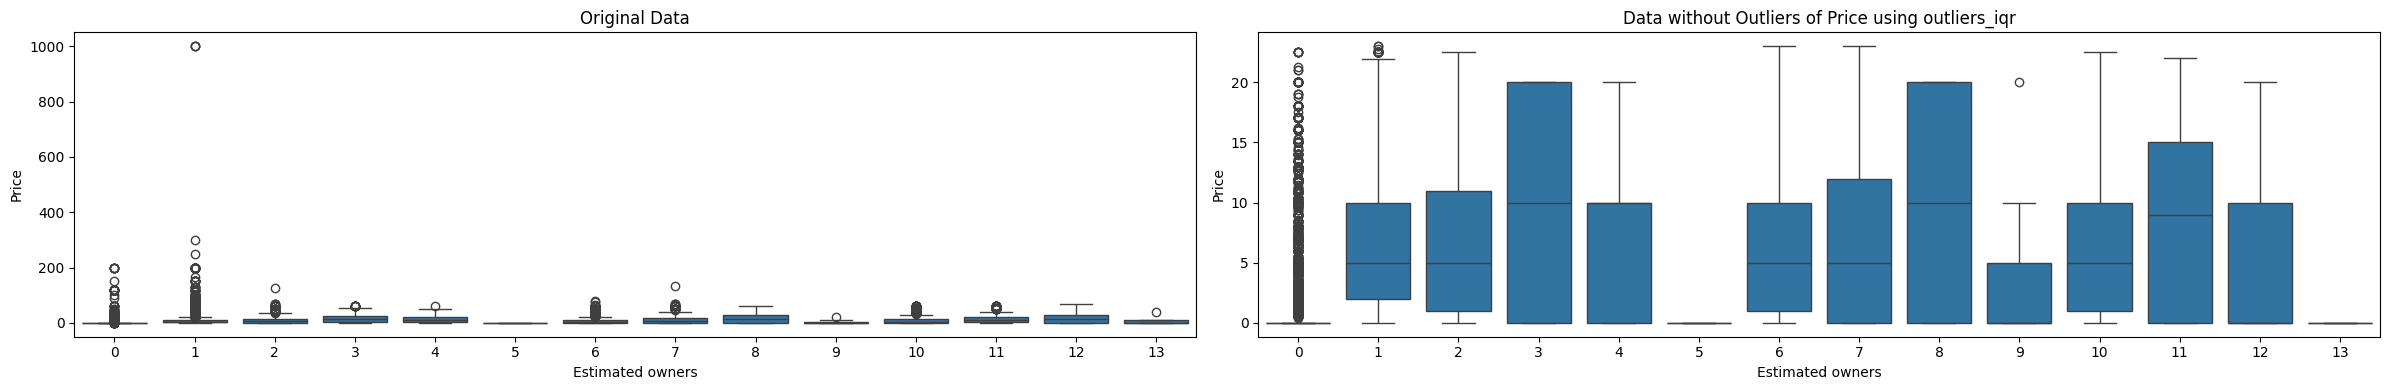

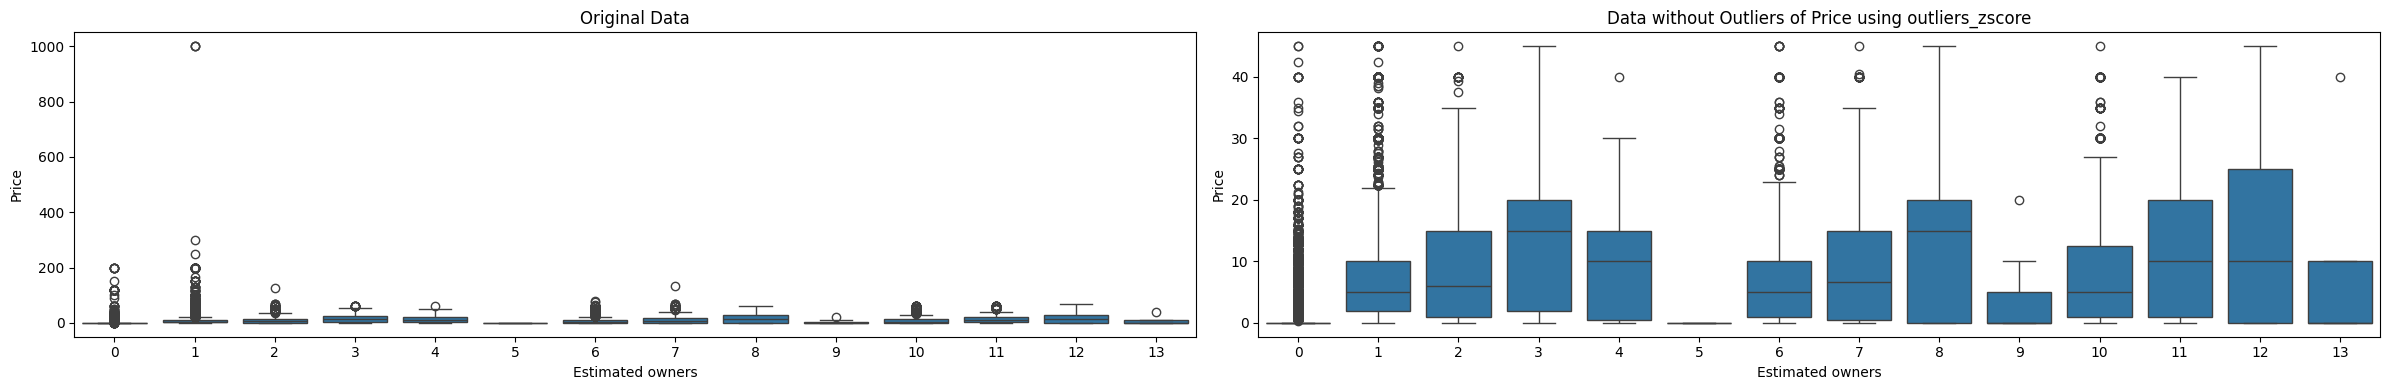

In [ ]:
plot_feature_with_outlier_methods(train_model3[[categorical_features[0]]+[target_feature]], target_feature, [outliers_iqr, outliers_zscore], sns.boxplot)

In [ ]:
print('Dataset shape before drop the outliers', train_model3.shape)
train_model3 = train_model3.drop(index=outlier_indices)
print('Dataset shape after drop the outliers ', train_model3.shape)

Dataset shape before drop the outliers (51061, 18)
Dataset shape after drop the outliers  (47928, 18)


In [ ]:
df_dtypes(train_model3)

,dtype,# columns,columns
0,int64,17,"['Estimated owners', 'Peak CCU', 'Required age', 'DLC count', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
1,float64,1,['Price']


In [ ]:
replace_inf(train_model3)
replace_inf(test_model3)
fillna(train_model3)
fillna(test_model3)

In [ ]:
X_train, X_test, y_train, y_test = split_data_train_test(train_model3, target_feature)

In [ ]:
models_result3 = run_models(baseline_models, X_train, X_test, y_train, y_test)

Model LinearRegression begining now ...
Model LinearRegression run in                      0.0 minutes
Model Ridge begining now ...
Model Ridge run in                                 0.0 minutes
Model DecisionTreeRegressor begining now ...
Model DecisionTreeRegressor run in                 0.01 minutes


In [ ]:
models_result3

,Model,Mean Absolute Error,Mean Squared Error,Mean Absolute Percentage Error,Median Absolute Error,Max Error,R^2,Explained Variance
0,LinearRegression,4.960507,45.642472,5.054905e+15,4.364345,39.741381,0.073014,0.073116
1,Ridge,4.960529,45.642437,5.054976e+15,4.364386,39.741357,0.073015,0.073116
2,DecisionTreeRegressor,5.172244,59.641654,2.648439e+15,3.476024,44.990000,-0.211305,-0.210478


<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


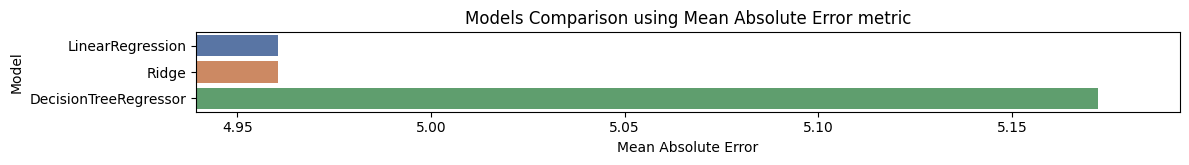

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


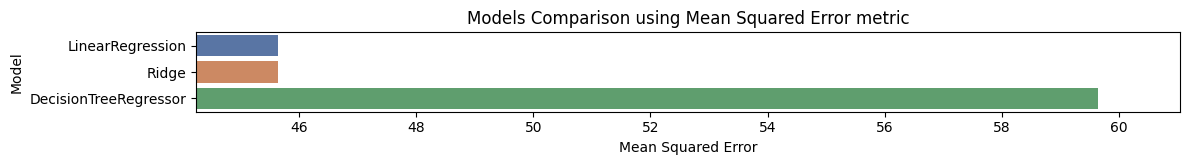

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


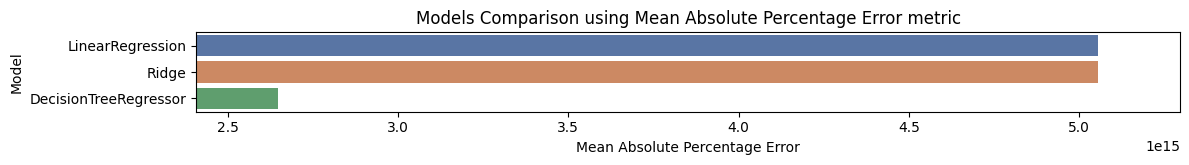

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


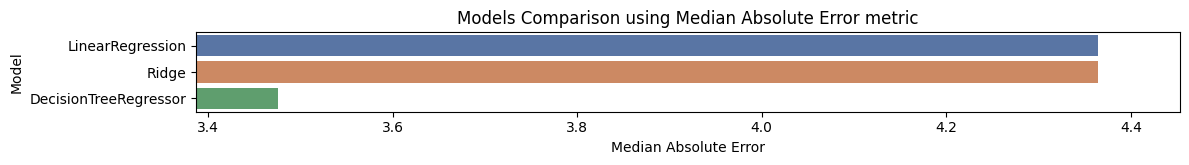

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


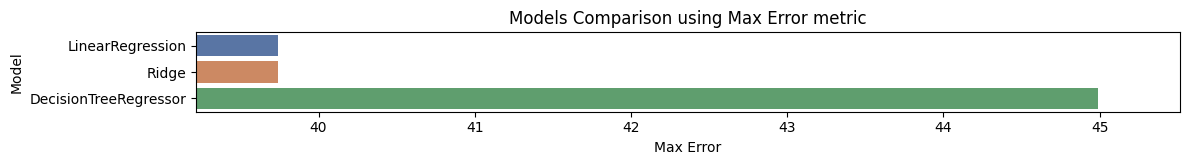

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


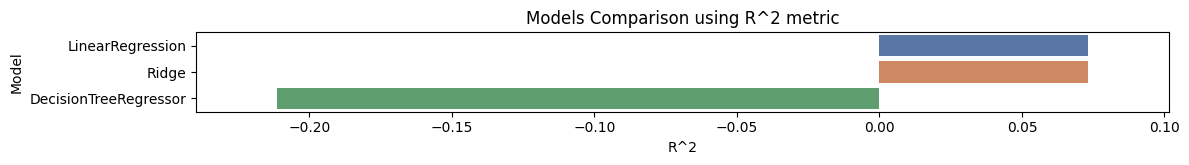

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


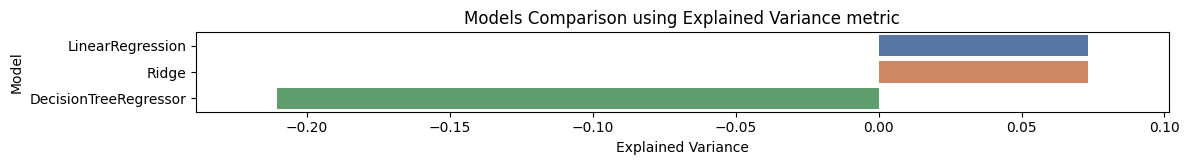

In [ ]:
for metric in metrics:
    plot_bar_chart(models_result3, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [ ]:
best_models3 = get_best_model(models_result3, baseline_models, 'Mean Squared Error')
print('Best Model of Outlier Treatment Models is:', best_models3.__class__.__name__)

Best Model of Outlier Treatment Models is: Ridge


In [ ]:
del train_model3, test_model3, X_train, X_test, y_train, y_test

In [ ]:
df_dtypes(train)

,dtype,# columns,columns
0,bool,3,"['Windows', 'Mac', 'Linux']"
1,int64,13,"['Peak CCU', 'Required age', 'DLC count', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
2,float64,1,['Price']
3,object,1,['Estimated owners']


In [ ]:
train_model4 = train.copy()
test_model4  = test.copy()

In [ ]:
encode_str_features(train_model4)
encode_str_features(test_model4)
df_dtypes(train_model4)

,dtype,# columns,columns
0,int64,17,"['Estimated owners', 'Peak CCU', 'Required age', 'DLC count', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
1,float64,1,['Price']


In [ ]:
train_model4 = train_model4.drop(columns=train_model6.select_dtypes(exclude=[np.number]).columns)
test_model4  = test_model4.drop(columns=test_model6.select_dtypes(exclude=[np.number]).columns)
df_dtypes(train_model4)

,dtype,# columns,columns
0,int64,13,"['Peak CCU', 'Required age', 'DLC count', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
1,float64,1,['Price']


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

def oversampling_imbalanced_data(df, target_feature, k_neighbors=5):
    if k_neighbors >= min(Counter(df[target_feature]).values()):
        return df
    X = df.drop(target_feature, axis=1)
    y = df[target_feature]
    oversampler = SMOTE(k_neighbors=k_neighbors)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                              pd.DataFrame(y_resampled, columns=[target_feature])], axis=1)
    return df_resampled

In [ ]:
def plot_imbalanced_feature(df, df_resampled, target_feature):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(x=df[target_feature])
    plt.title('Class Distribution Before Oversampling')
    plt.xlabel(target_feature)
    plt.subplot(1, 2, 2)
    sns.countplot(x=df_resampled[target_feature])
    plt.title('Class Distribution After Oversampling')
    plt.xlabel(target_feature)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_imbalanced_features(df, features):
    for col in features:
        if df[col].nunique() == 1:
            continue
        df_resampled = oversampling_imbalanced_data(df, col)
        if df.shape != df_resampled.shape:
            print(f'col: {col}, df.shape: {df.shape}, df_resampled.shape: {df_resampled.shape}')
            plot_imbalanced_feature(df, df_resampled, col)

In [ ]:
def oversampling_data(df, features):
    for col in features:
        if df[col].nunique() == 1:
            continue
        df_resampled = oversampling_imbalanced_data(df, col)
        df = df_resampled.copy()
    return df

In [ ]:
oversamplying_features = get_categorical_features(train_model4.select_dtypes(exclude=['float']), 3)
build_my_info_table(train_model4[oversamplying_features])

,#,column,dtype,count,mean,std,min,25%,50%,75%,max,IQR,nunique,unique,mode,mode #,mode %,null #,null %


In [ ]:
plot_imbalanced_features(train_model4, oversamplying_features)

In [ ]:
print('Dataset shape before apply the oversampling', train_model4.shape)
train_model6 = oversampling_data(train_model4, oversamplying_features)
print('Dataset shape after apply the oversampling ', train_model4.shape)

Dataset shape before apply the oversampling (51061, 14)
Dataset shape after apply the oversampling  (51061, 14)


In [ ]:
df_dtypes(train_model4)

,dtype,# columns,columns
0,int64,13,"['Peak CCU', 'Required age', 'DLC count', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
1,float64,1,['Price']


In [ ]:
replace_inf(train_model4)
replace_inf(train_model4)
fillna(train_model4)
fillna(train_model4)

In [ ]:
X_train, X_test, y_train, y_test = split_data_train_test(train_model4, target_feature)

In [ ]:
models_result4 = run_models(baseline_models, X_train, X_test, y_train, y_test)

Model LinearRegression begining now ...
Model LinearRegression run in                      0.0 minutes
Model Ridge begining now ...
Model Ridge run in                                 0.0 minutes
Model DecisionTreeRegressor begining now ...
Model DecisionTreeRegressor run in                 0.01 minutes


In [ ]:
models_result4

,Model,Mean Absolute Error,Mean Squared Error,Mean Absolute Percentage Error,Median Absolute Error,Max Error,R^2,Explained Variance
0,LinearRegression,6.338028,234.751325,6.054477e+15,4.906967,993.283033,-0.003518,-0.003493
1,Ridge,6.338028,234.751323,6.054477e+15,4.906967,993.283033,-0.003518,-0.003493
2,DecisionTreeRegressor,6.551034,258.553413,4.221363e+15,4.352938,995.627062,-0.105268,-0.105229


<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


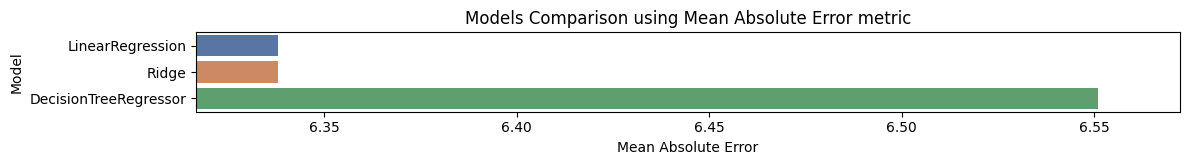

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


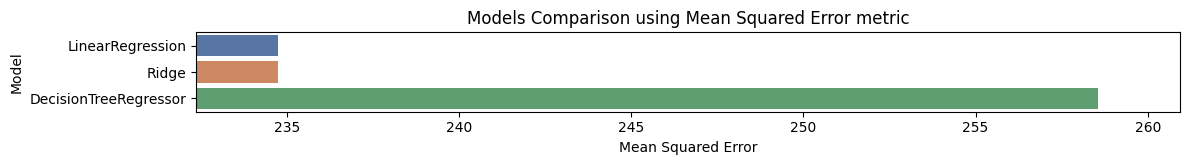

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


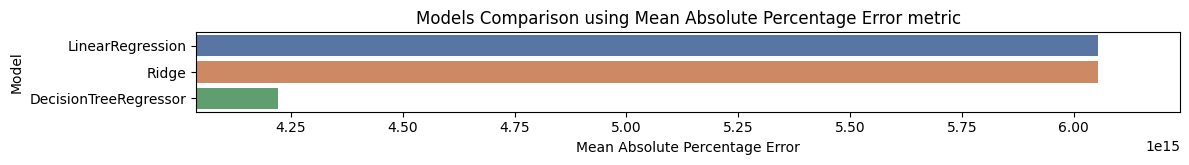

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


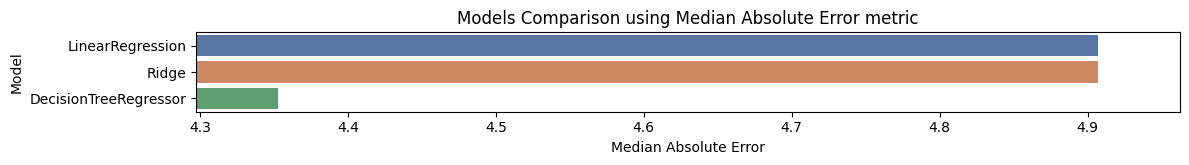

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


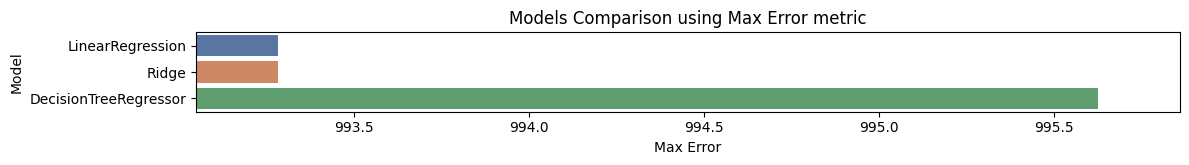

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


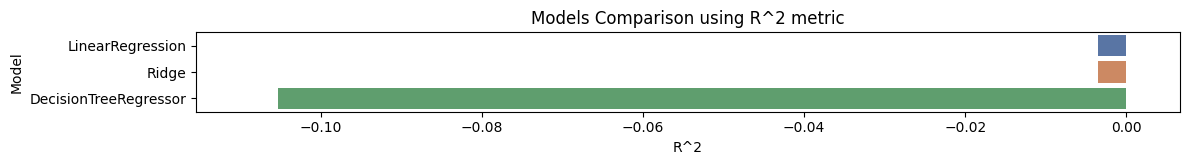

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


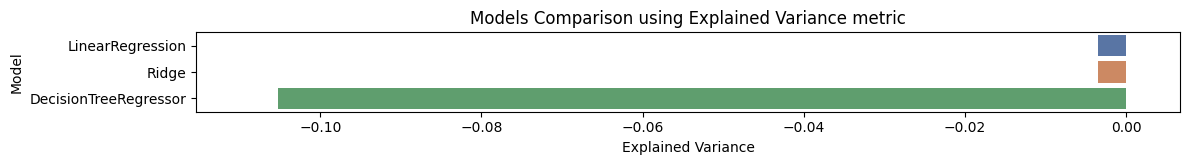

In [ ]:
for metric in metrics:
    plot_bar_chart(models_result4, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [ ]:
best_models4 = get_best_model(models_result4, baseline_models, 'Mean Squared Error')
print('Best Model of Imbalanced Data Treatment Models is:', best_models4.__class__.__name__)

Best Model of Imbalanced Data Treatment Models is: Ridge


In [ ]:
del train_model6, test_model6, X_train, X_test, y_train, y_test

In [ ]:
df_dtypes(train)

,dtype,# columns,columns
0,bool,3,"['Windows', 'Mac', 'Linux']"
1,int64,13,"['Peak CCU', 'Required age', 'DLC count', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
2,float64,1,['Price']
3,object,1,['Estimated owners']


In [ ]:
train_model5 = train.copy()
test_model5  = test.copy()

In [ ]:
df_dtypes(train_model5)

,dtype,# columns,columns
0,bool,3,"['Windows', 'Mac', 'Linux']"
1,int64,13,"['Peak CCU', 'Required age', 'DLC count', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
2,float64,1,['Price']
3,object,1,['Estimated owners']


In [ ]:
encode_str_features(train_model5)
encode_str_features(test_model5)
df_dtypes(train_model5)

,dtype,# columns,columns
0,int64,17,"['Estimated owners', 'Peak CCU', 'Required age', 'DLC count', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
1,float64,1,['Price']


In [ ]:
outlier_info = outlier_summary(train_model5, outliers_iqr, outliers_zscore)
outlier_indices = get_outlier_indices(outlier_info, outliers_iqr, outliers_zscore)

Total indices among all numerical features are: 3133 (6.1 %) of the dataset


In [ ]:
print('Dataset shape before drop the outliers', train_model5.shape)
train_model5 = train_model5.drop(index=outlier_indices)
print('Dataset shape after drop the outliers ', train_model5.shape)

Dataset shape before drop the outliers (51061, 18)
Dataset shape after drop the outliers  (47928, 18)


In [ ]:
train_model5 = train_model5.drop(columns=train_model5.select_dtypes(exclude=[np.number]).columns)
test_model5  = test_model5.drop(columns=test_model5.select_dtypes(exclude=[np.number]).columns)
df_dtypes(train_model5)

,dtype,# columns,columns
0,int64,17,"['Estimated owners', 'Peak CCU', 'Required age', 'DLC count', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"
1,float64,1,['Price']


In [ ]:
oversamplying_features = get_categorical_features(train_model5.select_dtypes(exclude=['float']), 3)
build_my_info_table(train_model5[oversamplying_features])

,#,column,dtype,count,mean,std,min,25%,50%,75%,max,IQR,nunique,unique,mode,mode #,mode %,null #,null %
0,0,Windows,int64,47928,1.0,0.0,0,1.0,1.0,1.0,1,1,2,"[1, 0]",1,47913,100.0,0,0.0
1,1,Mac,int64,47928,0.2,0.4,0,0.0,0.0,0.0,1,1,2,"[0, 1]",0,39164,81.7,0,0.0
2,2,Linux,int64,47928,0.1,0.3,0,0.0,0.0,0.0,1,1,2,"[0, 1]",0,41921,87.5,0,0.0


col: Windows, df.shape: (47928, 18), df_resampled.shape: (95826, 18)


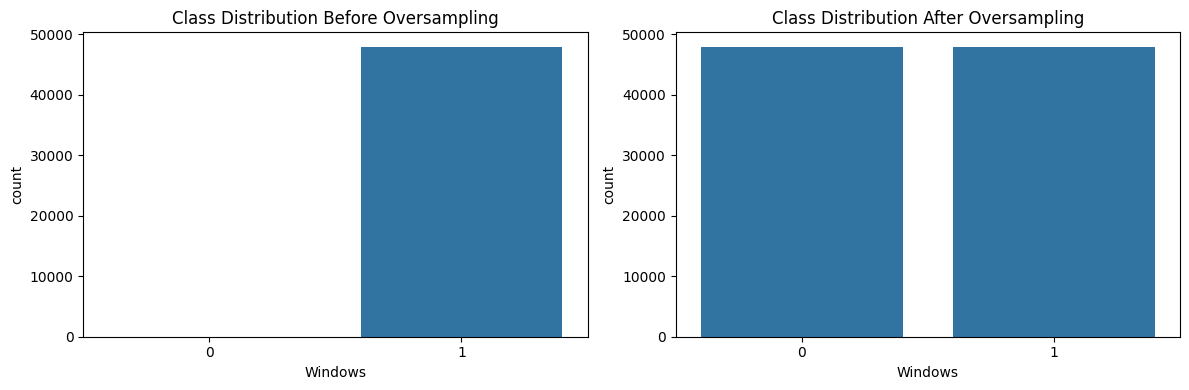

col: Mac, df.shape: (47928, 18), df_resampled.shape: (78328, 18)


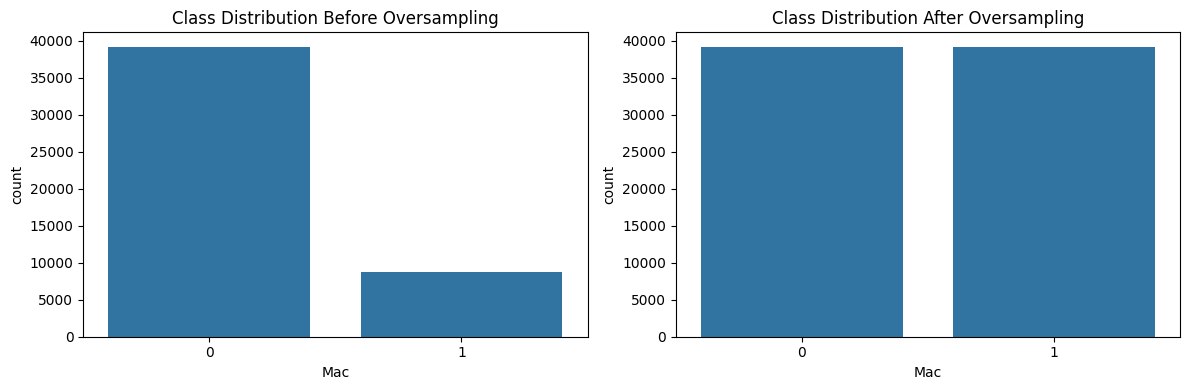

col: Linux, df.shape: (47928, 18), df_resampled.shape: (83842, 18)


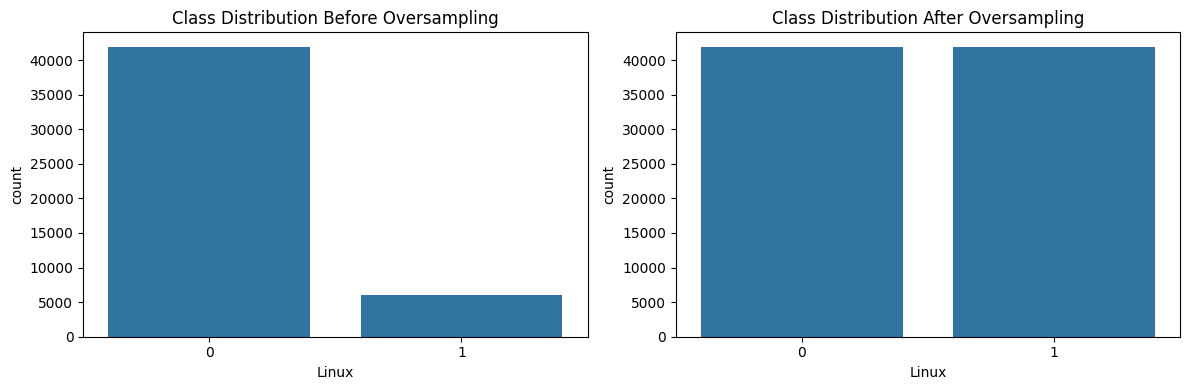

In [ ]:
plot_imbalanced_features(train_model5, oversamplying_features)

In [ ]:
print('Dataset shape before apply the oversampling', train_model5.shape)
train_model5 = oversampling_data(train_model5, oversamplying_features)
print('Dataset shape after apply the oversampling ', train_model5.shape)

Dataset shape before apply the oversampling (47928, 18)
Dataset shape after apply the oversampling  (47928, 18)


In [ ]:
skewed_features, non_skewed_features, skew_df = get_skewed_features(train_model5)
print(f'skewed_features:     {len(skewed_features)}\n{skewed_features}\n')
print(f'non_skewed_features: {len(non_skewed_features)}\n{non_skewed_features}\n')

skewed_features:     11
['Peak CCU', 'Negative', 'Recommendations', 'Positive', 'Average playtime two weeks', 'Median playtime two weeks', 'DLC count', 'Median playtime forever', 'Average playtime forever', 'Achievements', 'Price']

non_skewed_features: 0
[]



In [ ]:
transform_skewed_features(train_model5, skewed_features)
transform_non_skewed_features(train_model5, non_skewed_features)

In [ ]:
skewed_features, non_skewed_features, skew_df = get_skewed_features(test_model5)
print(f'skewed_features:     {len(skewed_features)}\n{skewed_features}\n')
print(f'non_skewed_features: {len(non_skewed_features)}\n{non_skewed_features}\n')

skewed_features:     11
['Median playtime forever', 'DLC count', 'Peak CCU', 'Recommendations', 'Negative', 'Average playtime forever', 'Positive', 'Average playtime two weeks', 'Median playtime two weeks', 'Achievements', 'Metacritic score']

non_skewed_features: 0
[]



In [ ]:
transform_skewed_features(test_model5, skewed_features)
transform_non_skewed_features(test_model5, non_skewed_features)

In [ ]:
df_dtypes(train_model5)

,dtype,# columns,columns
0,int64,7,"['Estimated owners', 'Required age', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'User score']"
1,float64,11,"['Peak CCU', 'Price', 'DLC count', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']"


In [ ]:
replace_inf(train_model5)
replace_inf(test_model5)
fillna(train_model5)
fillna(test_model5)

In [ ]:
X, y = split_data_X_y(train_model5, target_feature)

In [ ]:
features_importance = feature_selection(X, y, mutual_info_regression)

In [ ]:
selected_features = features_importance['Feature']
X_selected  = X[selected_features]
test_model5 = test_model5[selected_features]

In [ ]:
X_train_test_model5 = pd.concat([X_selected, test_model5])
X_train_test_model5 = one_hot_encoding(X_train_test_model5)
X_selected  = X_train_test_model5[:len(X_selected)]
test_model5 = X_train_test_model5[-len(test_model5):]
df_dtypes(X_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,dtype,# columns,columns
0,float64,21,"['Positive', 'Negative', 'Achievements', 'Peak CCU', 'Median playtime forever', 'Recommendations', 'Average playtime forever', 'DLC count', 'Average playtime two weeks', 'Estimated owners_1', 'Estimated owners_2', 'Estimated owners_3', 'Estimated owners_4', 'Estimated owners_5', 'Estimated owners_6', 'Estimated owners_7', 'Estimated owners_8', 'Estimated owners_9', 'Estimated owners_10', 'Estimated owners_11', 'Estimated owners_12']"


In [ ]:
X_train, X_test, y_train, y_test = split_data_train_test(pd.concat([X_selected, y], axis=1), target_feature)

In [ ]:
models_result5 = run_models(baseline_models, X_train, X_test, y_train, y_test)

Model LinearRegression begining now ...
Model LinearRegression run in                      0.0 minutes
Model Ridge begining now ...
Model Ridge run in                                 0.0 minutes
Model DecisionTreeRegressor begining now ...
Model DecisionTreeRegressor run in                 0.01 minutes


In [ ]:
models_result5

,Model,Mean Absolute Error,Mean Squared Error,Mean Absolute Percentage Error,Median Absolute Error,Max Error,R^2,Explained Variance
0,LinearRegression,0.695018,0.725648,7.549944e+14,0.572479,3.443984,0.289547,0.289619
1,Ridge,0.695048,0.725611,7.552710e+14,0.573028,3.443180,0.289584,0.289656
2,DecisionTreeRegressor,0.774727,1.040694,6.572065e+14,0.606894,3.713328,-0.018902,-0.018746


<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


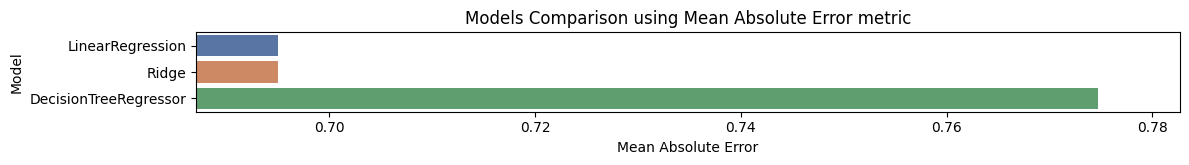

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


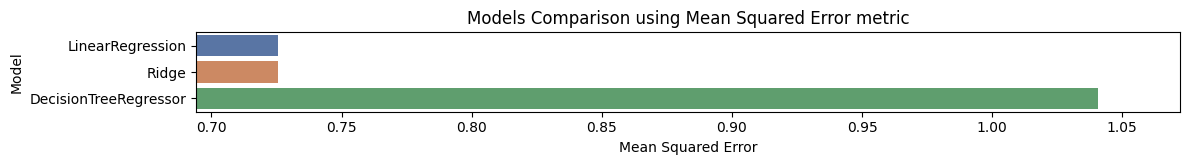

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


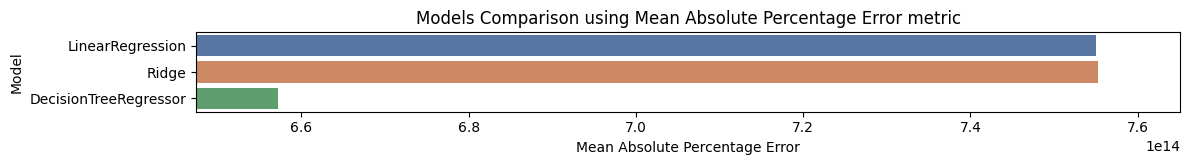

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


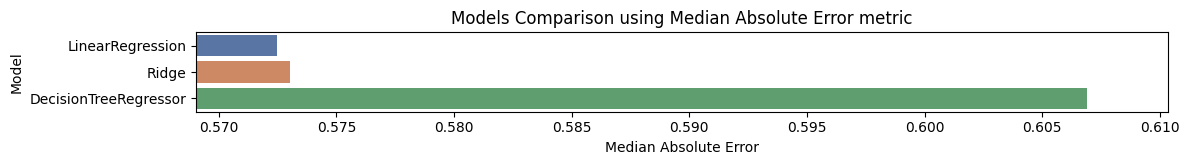

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


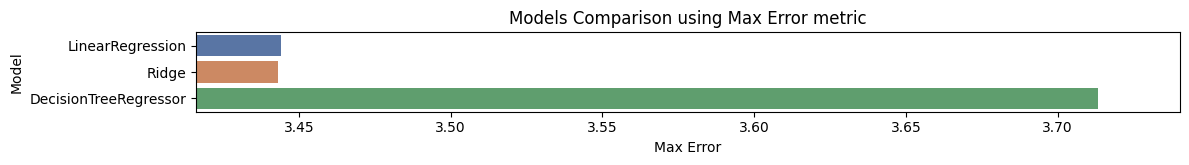

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


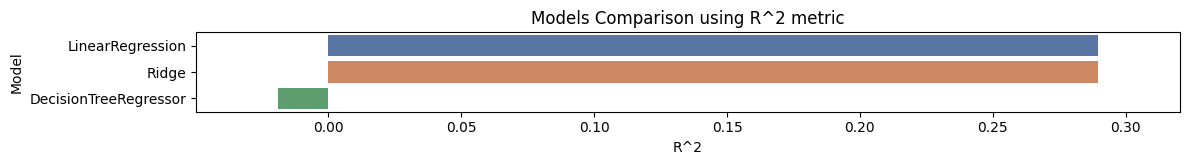

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


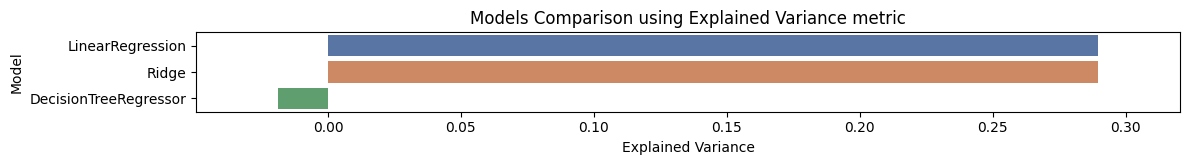

In [ ]:
for metric in metrics:
    plot_bar_chart(models_result5, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [ ]:
best_models5 = get_best_model(models_result5, baseline_models, 'Mean Squared Error')
print('Best Model of Combine All Enhancements Models is:', best_models5.__class__.__name__)

Best Model of Combine All Enhancements Models is: Ridge


In [ ]:
X_selected6 = X_selected.copy()
test_model6 = test_model5.copy()

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing   import StandardScaler
from sklearn.impute          import SimpleImputer
from sklearn.pipeline        import Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing   import OneHotEncoder

In [ ]:
def get_preprocessor(df):
    numerical_features   = df.select_dtypes(include=[np.number]).columns
    categorical_features = df.select_dtypes(exclude=[np.number]).columns

    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler',  StandardScaler())
    ])
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot',  OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer([
        ('num', numerical_pipeline,   numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

    return preprocessor

In [ ]:
preprocessor = get_preprocessor(X_selected6)
X_selected6   = pd.DataFrame(preprocessor.fit_transform(X_selected6))

In [ ]:
preprocessor = get_preprocessor(test_model6)
test_model6  = pd.DataFrame(preprocessor.fit_transform(test_model6))

In [ ]:
from sklearn.linear_model    import LinearRegression, \
                                    Ridge
from sklearn.ensemble        import RandomForestRegressor, \
                                    GradientBoostingRegressor, \
                                    AdaBoostRegressor, \
                                    ExtraTreesRegressor
from sklearn.svm             import SVR
from sklearn.tree            import DecisionTreeRegressor
from sklearn.neighbors       import KNeighborsRegressor
from xgboost                 import XGBRegressor
from lightgbm                import LGBMRegressor

models = {
    'XGBRegressor':              XGBRegressor(),
    'LGBMRegressor':             LGBMRegressor(verbose=-1),
    'LinearRegression':          LinearRegression(),
    'Ridge':                     Ridge(alpha=10),
    'DecisionTreeRegressor':     DecisionTreeRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor':         AdaBoostRegressor(),
    'ExtraTreesRegressor':       ExtraTreesRegressor(),
    'KNeighborsRegressor':       KNeighborsRegressor(),
}
#    'RandomForestRegressor':     RandomForestRegressor(),
#    'SupportVectorRegressor':    SVR(),

In [ ]:
from sklearn.metrics         import mean_absolute_error, \
                                    mean_squared_error, \
                                    mean_absolute_percentage_error, \
                                    median_absolute_error, \
                                    max_error, \
                                    r2_score, \
                                    explained_variance_score

def evaluate_model(y_tests, y_preds, kf):
    mae, mse, mape, medae, me, r2, ev = 0, 0, 0, 0, 0, 0, 0
    for y_test, y_pred in zip(y_tests, y_preds):
        mae   += mean_absolute_error(y_test, y_pred)
        mse   += mean_squared_error(y_test, y_pred)
        mape  += mean_absolute_percentage_error(y_test, y_pred)
        medae += median_absolute_error(y_test, y_pred)
        me    += max_error(y_test, y_pred)
        r2    += r2_score(y_test, y_pred)
        ev    += explained_variance_score(y_test, y_pred)

    result = {
        'Mean Absolute Error': mae / kf,
        'Mean Squared Error': mse / kf,
        'Mean Absolute Percentage Error': mape / kf,
        'Median Absolute Error': medae / kf,
        'Max Error': me / kf,
        'R^2': r2 / kf,
        'Explained Variance': ev / kf,
    }
    return result

In [ ]:
def run_model(model, X, y, kf):
    kfold = KFold(n_splits=kf, shuffle=True, random_state=42)
    y_tests, y_preds = [], []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        y_tests.append(y_test)
        y_preds.append(y_pred)

    return y_tests, y_preds

In [ ]:
def run_models(models, X, y, kf=5):
    results = {}
    for name, model in models.items():
        print(f'Model {name} begining now ...')
        begin_time = time.time()
        y_tests, y_preds = run_model(model, X, y, kf)
        results[name] = evaluate_model(y_tests, y_preds, kf)
        end_time = time.time()
        duration = round((end_time - begin_time) / 60, 2)
        print(f'Model {name} run in'.ljust(50), f'{duration} minutes')
    results = pd.DataFrame(results).T
    results = results.reset_index()
    results = results.rename(columns={'index': 'Model'})
    return results

In [ ]:
models_result6 = run_models(models, X_selected6, y)

Model XGBRegressor begining now ...
Model XGBRegressor run in                          0.32 minutes
Model LGBMRegressor begining now ...
Model LGBMRegressor run in                         0.05 minutes
Model LinearRegression begining now ...
Model LinearRegression run in                      0.01 minutes
Model Ridge begining now ...
Model Ridge run in                                 0.0 minutes
Model DecisionTreeRegressor begining now ...
Model DecisionTreeRegressor run in                 0.02 minutes
Model GradientBoostingRegressor begining now ...
Model GradientBoostingRegressor run in             0.62 minutes
Model AdaBoostRegressor begining now ...
Model AdaBoostRegressor run in                     0.1 minutes
Model ExtraTreesRegressor begining now ...
Model ExtraTreesRegressor run in                   0.64 minutes
Model KNeighborsRegressor begining now ...
Model KNeighborsRegressor run in                   0.24 minutes


In [ ]:
models_result6

,Model,Mean Absolute Error,Mean Squared Error,Mean Absolute Percentage Error,Median Absolute Error,Max Error,R^2,Explained Variance
0,XGBRegressor,0.658440,0.682150,6.892733e+14,0.534990,3.575356,0.335978,0.336009
1,LGBMRegressor,0.656368,0.669653,6.977180e+14,0.533193,3.521759,0.348163,0.348200
2,LinearRegression,0.699779,0.731718,7.647226e+14,0.585288,3.411272,0.287760,0.287797
3,Ridge,0.699849,0.731725,7.651427e+14,0.585331,3.413644,0.287752,0.287790
4,DecisionTreeRegressor,0.778415,1.044592,6.786396e+14,0.607420,3.713328,-0.016796,-0.016736
5,GradientBoostingRegressor,0.670533,0.683399,7.376996e+14,0.542583,3.361138,0.334791,0.334836
6,AdaBoostRegressor,0.756792,0.791063,1.071156e+15,0.797202,2.758659,0.229897,0.231822
7,ExtraTreesRegressor,0.692301,0.779160,6.768662e+14,0.553375,3.529805,0.241537,0.241553
8,KNeighborsRegressor,0.722818,0.803693,8.334614e+14,0.634076,3.489348,0.217688,0.220763


<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


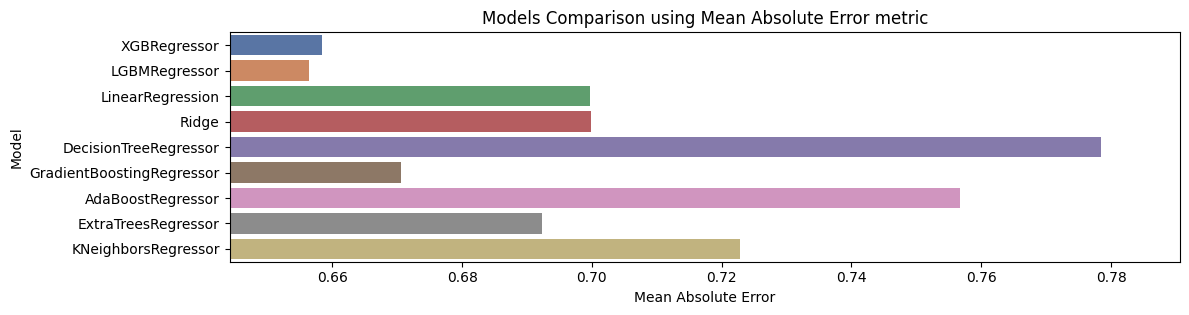

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


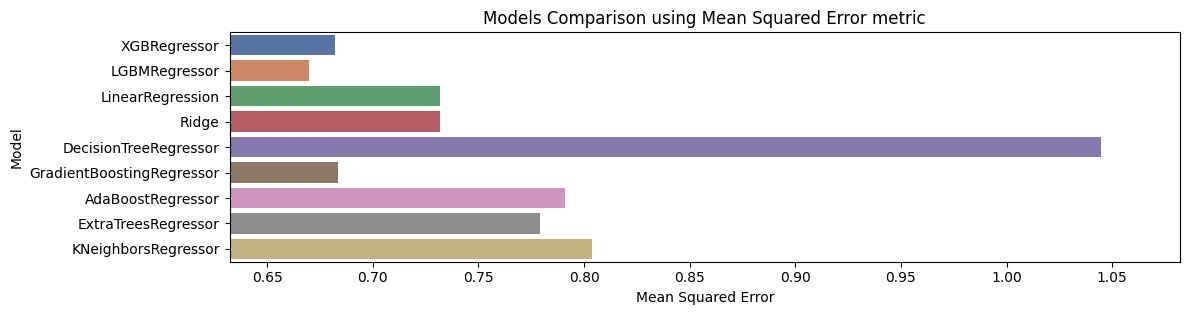

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


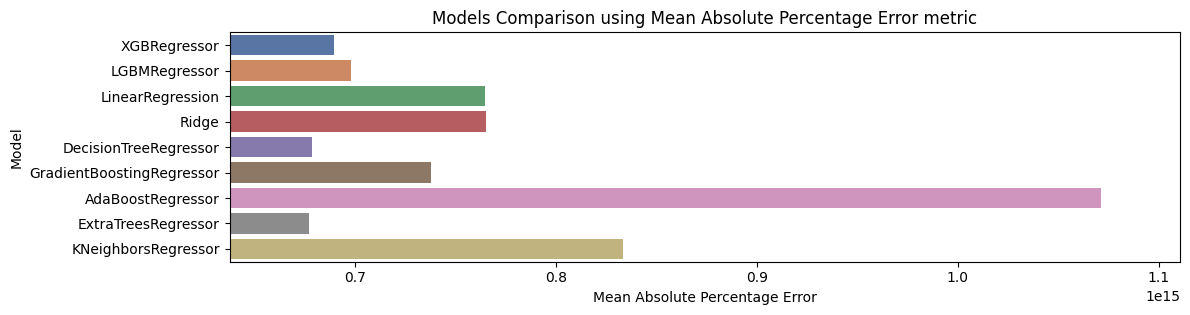

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


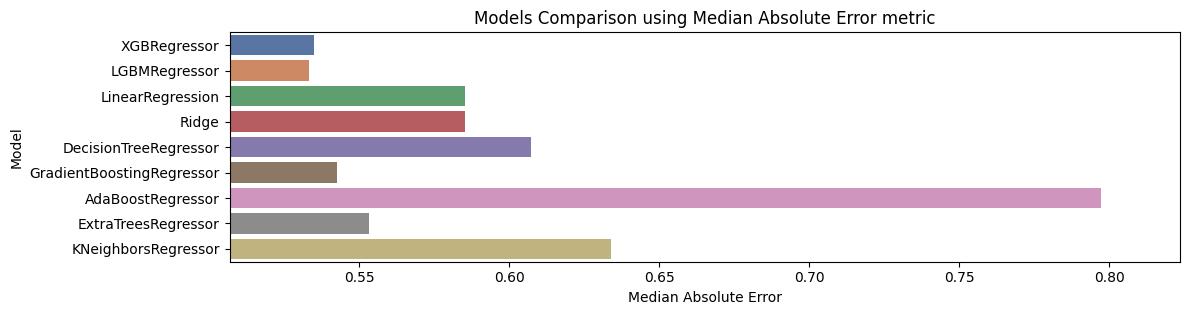

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


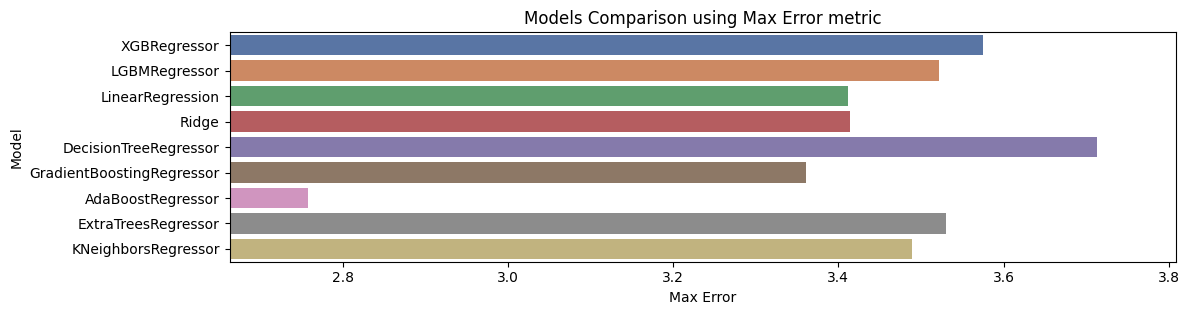

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


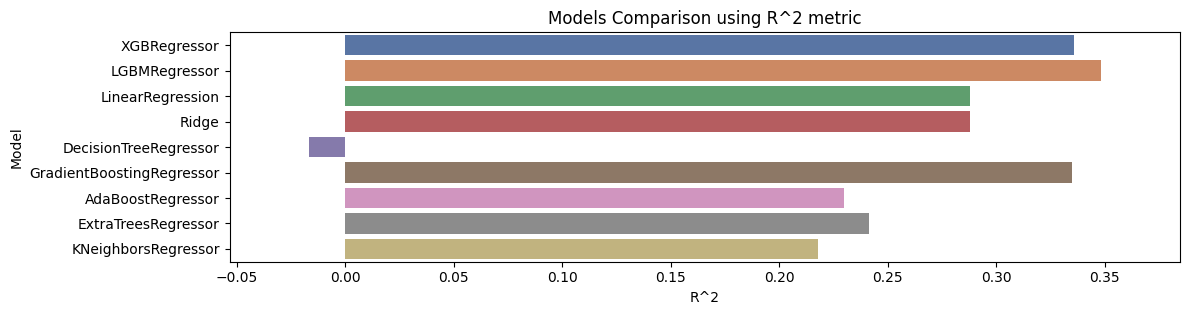

<ipython-input-157-b9dd20954268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[y], x=df[x], palette=palette)


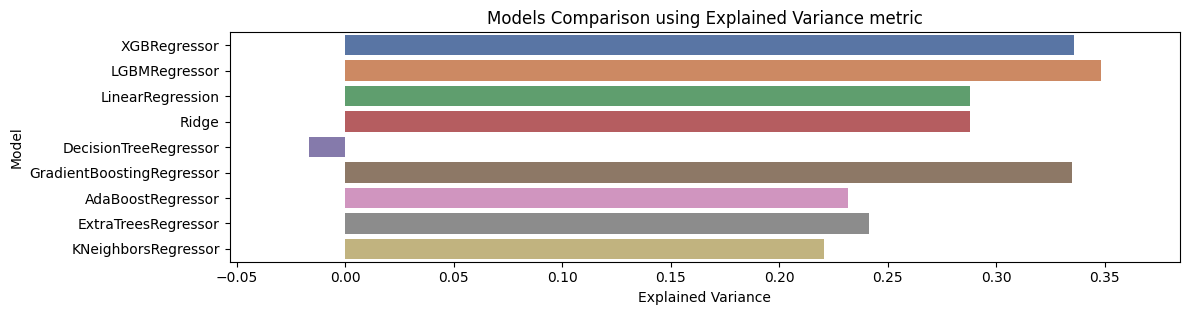

In [ ]:
for metric in metrics:
    plot_bar_chart(models_result6, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [ ]:
best_models6 = get_best_model(models_result6, models, 'Mean Squared Error')
print('Best Model of Other Predictive Models is:', best_models6.__class__.__name__)

Best Model of Other Predictive Models is: LGBMRegressor
